# **Project Name** - **Netflix Movies and TV Shows Clustering**

#####**Project Type** - Unsupervised Learning
#####**Contribution** - Team
##### **Team Member - 1** - Shivam Tiwari
##### **Team Member - 2** - Tapomay Sahoo

#**Project Summary**

Hello, all. We have worked on the Netflix Movies and TV Shows dataset provided by a third party until the year of 2019. The dataset contains information of the various TV Shows, Movies, Documentaries and many more content on the streaming service provider's website.

Title, Cast, Director, Country of Production and Description are some of the things available for each content on the streaming website.

We have tried to work on the data and get three things out of it:

a. We have tried to generate insights through the EDA process

b. We have tried to analyse the change in Netflix's operations

c. And most importantly, we have tried to build a machine learning clustering model that helps us segregate the contents based on similarity in various features.

We hope that you like the project and we would like to listen to your thoughts on it. You can reach us at shivchirag1997@gmail.com and er.tapomay@gmail.com

#**Github Link**

The official github link of the project is https://github.com/shivchirag/Netflix_Movies_and_TV_Shows_Clustering

# **Problem Statement**


**BUSINESS OVERVIEW**

Netflix is a very popular online streaming service provider offering a variety of TV shows, movies, documentaries and lots more to watch. We have the dataset containing the list of their TV shows, movies and the other content that they have on their platform. The list is procured from a third party website and contains information until 2021.

We are supposed to offer insights from the dataset on Netflix and its content. We are also supposed to cluster the contents based on text features.

# ***Let's Begin !*** 

## ***1. Know Your Data***

####Import Libraries

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.dates as mdates
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.float_format = '{:.2f}'.format
import scipy.stats
from statsmodels.stats.weightstats import ztest as ztest
from sklearn.preprocessing import MinMaxScaler
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

####Dataset Loading

In [ ]:
# Loading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/netflix.csv')

In [ ]:
# Generating a copy
df = dataset.copy()

####Dataset Overview

In [ ]:
# First view of the dataset
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
# No. of rows and columns
df.shape

(7787, 12)

In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


####Duplicate and Null Values

In [ ]:
# Duplicates in the dataset
len(df[df.duplicated()])

0

In [ ]:
# Missing Values
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


#### What do we know now about the dataset?

From the first looks, the dataset looks like it will need some cleaning.

We have 7787 datapoints and 12 columns. Most of the variables are text data. Only release year is numeric, but it is also discrete in nature.

## ***2. Understanding the variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777       7787.00   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN       2013.93    NaN       NaN   
std               NaN              NaN          8.76    NaN       NaN   
min               NaN              NaN       1925.00    NaN       NaN   
25%               NaN              NaN       2013.00    NaN       NaN   
50%               NaN              NaN       2017.00    NaN       NaN   
75%               NaN              NaN       2018.00    NaN       NaN   
max               NaN              NaN       2021.00    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

####Variables Description

**show_id :** Unique ID for every TV show/movie

**type :** Movie or a TV Show

**title :** Title of the content

**director :** Director of the content

**cast :** Star cast of the content

**country :** Country of production

**date_added :** Date the content was added on Netflix

**release_year :** Release year of the content

**rating :** TV Rating of the content

**duration :** No. of mins (how long) in case of movies and No. of seasons in case of TV shows

**listed_in :** Genre of the content

**description :** Summary description for the content

####Checking number of unique values

In [ ]:
# Check unique values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


## ***3. Data Wrangling***

In [ ]:
# Converting the Date column to datetime datatype
df.date_added = pd.to_datetime(df.date_added,dayfirst=True)

In [ ]:
# Creating columns for month, year and day of the week when the contents were added
df['month_added'] = pd.DatetimeIndex(df.date_added).month
df['day_of_week_added'] = pd.DatetimeIndex(df.date_added).dayofweek
df['year_added'] = pd.DatetimeIndex(df.date_added).year
df['day_of_month_added'] = pd.DatetimeIndex(df.date_added).day

In [ ]:
df['date_month_added'] = df['date_added'].dt.strftime('%d-%m %H:%M:%S')

In [ ]:
# Segregating the dataset based on content type
tv_df = df[df.type=='TV Show']
movies_df = df[df.type=='Movie']

We have segregated the dataset based on the content type. We have also made the date_added column's datatype datetime. And then we extracted the month, year and day of the week as individual columns from the main column.

## ***4. Understanding the relationships between variables using different kinds of visualisation techniques:***


####4.1 How many TV shows and how many movies?

In [ ]:
pie_data = df.type.value_counts(normalize=True).reset_index()
pie_data

index  type
0    Movie  0.69
1  TV Show  0.31

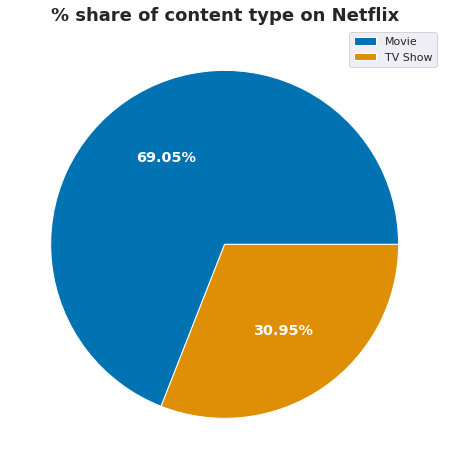

In [ ]:
# Plotting the graph
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['type'],
        labels = pie_data['index'].values,
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of content type on Netflix", fontweight = "bold", fontsize = 18)
plt.show();

**Observation:**

There are more than double the amount of Movies than TV Shows on Netflix. Movies account for 69.05% whereas TV Shows account for 30.95% of the dataset.

####4.2 Which are the top 20 dates when the contents are added?

In [ ]:
# Preparing the dataset
bar_data = df.groupby('date_month_added').agg({'date_month_added':'count'}).rename(columns={'date_month_added':'count'}).reset_index().sort_values(by='count', ascending=False).head(20)
bar_data['date_month_added'] = bar_data['date_month_added'].astype('str')
new = bar_data['date_month_added'].str.split(' ', expand=True)
bar_data['date_month_added'] = new[0]
bar_data.head()

date_month_added  count
0             01-01    320
9             01-10    257
10            01-11    244
6             01-07    179
3             01-04    156

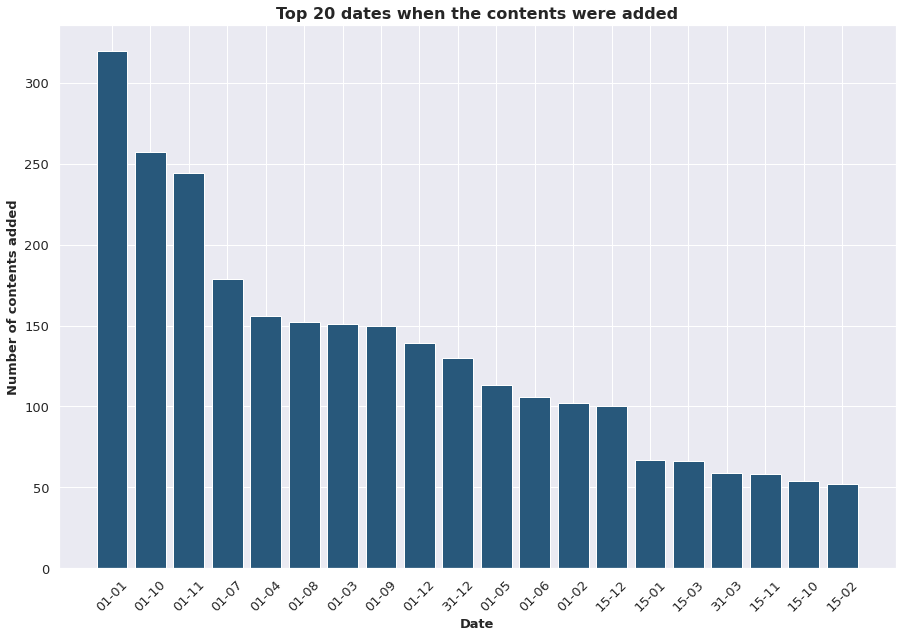

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['date_month_added'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13, rotation = 45)
plt.yticks(fontsize = 13)
plt.title('Top 20 dates when the contents were added', fontsize = 16, fontweight = 'bold')
plt.xlabel('Date', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents added', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

If we look at the distribution of the dates when the contents were added, the second half of a year (the holiday period) is usually when they add the content and it is either on the 1st or the 15th or the 31st.

####4.3 Distribution of the content's country of production

In [ ]:
# Preparing the dataset
# Overall country count
country_df = df.country.str.split(', ', expand=True).stack().reset_index().rename(columns={'level_0':'index','level_1':'nth country',0:'country'})
country_df = country_df.country.value_counts().reset_index().rename(columns={'index':'country','country':'total'})
# Country count for movies
movies_country_df = movies_df.country.str.split(', ', expand=True).stack().reset_index().rename(columns={'level_0':'index','level_1':'nth country',0:'country'})
movies_country_df = movies_country_df.country.value_counts().reset_index().rename(columns={'index':'country','country':'total_movies'})
# Country count for TV Shows
tv_country_df = tv_df.country.str.split(', ', expand=True).stack().reset_index().rename(columns={'level_0':'index','level_1':'nth country',0:'country'})
tv_country_df = tv_country_df.country.value_counts().reset_index().rename(columns={'index':'country','country':'total_TV'})
# Merging the datsets
country_df = country_df.merge(movies_country_df, on='country')
country_df = country_df.merge(tv_country_df, on='country')
country_df.head()

country  total  total_movies  total_TV
0   United States   3296          2430       866
1           India    990           915        75
2  United Kingdom    722           466       256
3          Canada    412           286       126
4          France    349           265        84

In [ ]:
# Selecting the dataset
bar_data = country_df.head(10)
bar_data

country  total  total_movies  total_TV
0   United States   3296          2430       866
1           India    990           915        75
2  United Kingdom    722           466       256
3          Canada    412           286       126
4          France    349           265        84
5           Japan    287           103       184
6           Spain    215           158        57
7     South Korea    212            55       157
8         Germany    199           157        42
9          Mexico    154           101        53

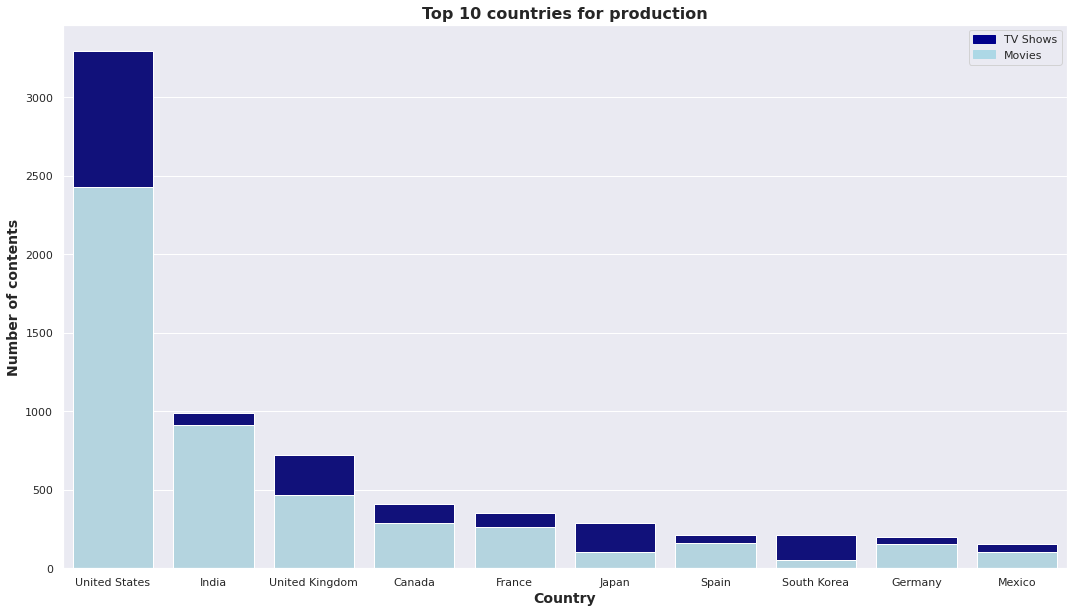

In [ ]:
# Creating the plot
sns.set(style="darkgrid")
plt.figure(figsize=(18,10))
bar1 = sns.barplot(x="country",  y="total", data=bar_data, color='darkblue')
bar2 = sns.barplot(x="country",  y="total_movies", data=bar_data, ci=None, color='lightblue')
# add legend
top_bar = mpatches.Patch(color='darkblue', label='TV Shows')
bottom_bar = mpatches.Patch(color='lightblue', label='Movies')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('Country', fontsize = 14, weight = "bold")
plt.ylabel('Number of contents', fontsize = 14, weight = "bold")
plt.title('Top 10 countries for production', fontsize = 16, weight = "bold")
# show the graph
plt.show();

**Observation:**

United States has the highest number of contents produced and it is three times in numbers when compared with the next best in line, India.

Countries generally focus a lot on movies, but there are exceptions. East Asian countries like Japan and South Korea produce more TV Shows than movies.

Whereas, a country like India could do a lot better in the TV Shows domain.

####4.4 Which are the popular years and months for TV series and movies addition?

In [ ]:
# Creating the dataset
# Overall data
year_added_df = df.year_added.value_counts().reset_index().rename(columns={'index':'year','year_added':'total'})
year_added_df['year'] = year_added_df['year'].astype('int')
# TV data
tv_year_added = tv_df.year_added.value_counts().reset_index().rename(columns={'index':'year','year_added':'total_tv'})
tv_year_added['year'] = tv_year_added['year'].astype('int')
# Movies data
movies_year_added = movies_df.year_added.value_counts().reset_index().rename(columns={'index':'year','year_added':'total_movies'})
movies_year_added['year'] = movies_year_added['year'].astype('int')
# Merging the datasets
year_added_df = year_added_df.merge(tv_year_added, on='year')
year_added_df = year_added_df.merge(movies_year_added, on='year')
# Sorting the values and keeping only years till 2020
year_added_df = year_added_df.sort_values(by='year').reset_index(drop=True)
year_added_df = year_added_df[year_added_df['year'].isin([x for x in range(2000,2021)])]
line_data = year_added_df

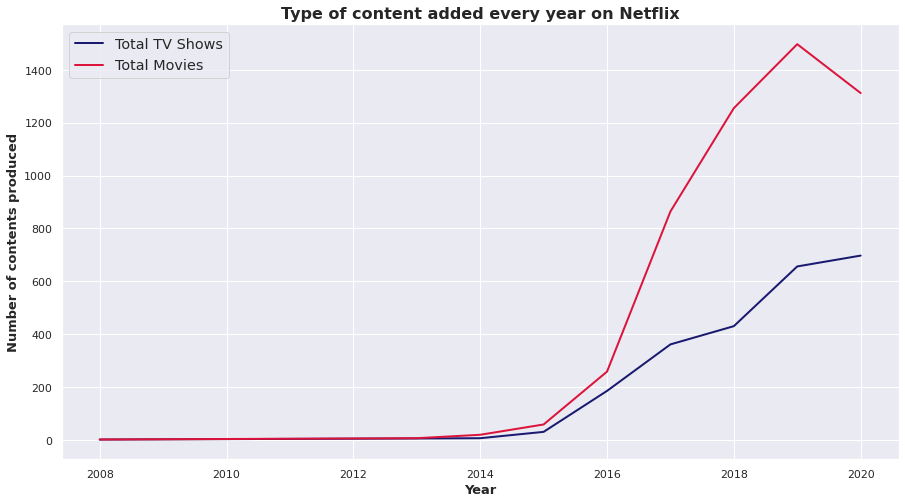

In [ ]:
# Setting the size of the figure
plt.figure(figsize = (15,8))
# Plotting the lines
plt.plot(line_data['year'], line_data['total_tv'], color = 'midnightblue', linewidth = 2)
plt.plot(line_data['year'], line_data['total_movies'], color = 'crimson', linewidth = 2)
# Assigning the labels
plt.ylabel('Number of contents produced', fontsize = 13, fontweight = 'bold')
plt.xlabel('Year', fontsize = 13, fontweight = 'bold')
# Adding labels
labels = ['Total TV Shows','Total Movies']
plt.legend(labels = labels, fontsize = 'large')
plt.title('Type of content added every year on Netflix', fontsize = 16, fontweight = "bold")
plt.show();

**Observation:**

Netflix really took off since 2015, before which the rate at which newer contents were added were quite slow. Also, while movies are added in large numbers, their growth has stopped and the numbers went down for the first time while going from 2019 to 2020.

While in contrast, TV Shows have almost shown a steady growth and never saw any kind of drop in numbers, not even going in 2020.

In [ ]:
# Creating the dataset
# Overall data
month_added_df = df.month_added.value_counts().reset_index().rename(columns={'index':'month','month_added':'total'})
month_added_df['month'] = month_added_df['month'].astype('int')
# TV data
tv_month_added = tv_df.month_added.value_counts().reset_index().rename(columns={'index':'month','month_added':'total_tv'})
tv_month_added['month'] = tv_month_added['month'].astype('int')
# Movies data
movies_month_added = movies_df.month_added.value_counts().reset_index().rename(columns={'index':'month','month_added':'total_movies'})
movies_month_added['month'] = movies_month_added['month'].astype('int')
# Merging the datasets
month_added_df = month_added_df.merge(tv_month_added, on='month')
month_added_df = month_added_df.merge(movies_month_added, on='month')
# Sorting the values
month_added_df = month_added_df.sort_values(by='month').reset_index(drop=True)
line_data = month_added_df

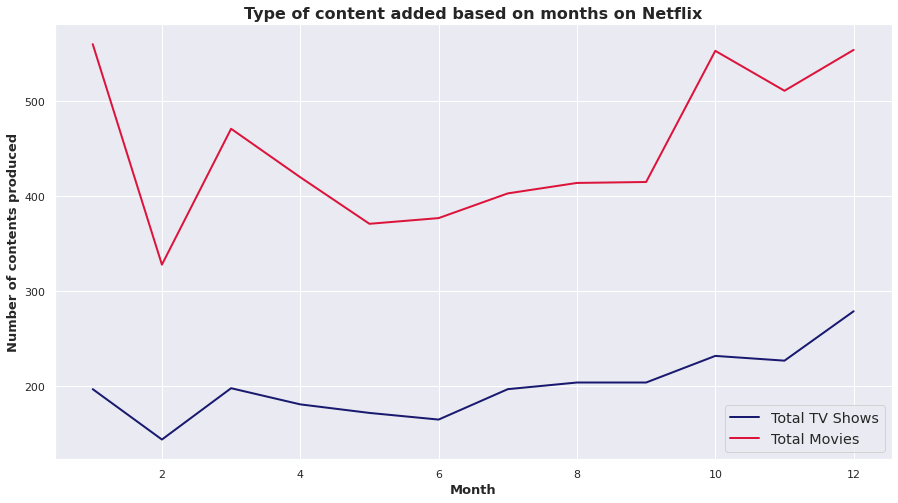

In [ ]:
# Setting the size of the figure
plt.figure(figsize = (15,8))
# Plotting the lines
plt.plot(line_data['month'], line_data['total_tv'], color = 'midnightblue', linewidth = 2)
plt.plot(line_data['month'], line_data['total_movies'], color = 'crimson', linewidth = 2)
# Assigning the labels
plt.ylabel('Number of contents produced', fontsize = 13, fontweight = 'bold')
plt.xlabel('Month', fontsize = 13, fontweight = 'bold')
# Adding labels
labels = ['Total TV Shows','Total Movies']
plt.legend(labels = labels, fontsize = 'large')
plt.title('Type of content added based on months on Netflix', fontsize = 16, fontweight = "bold")
plt.show();

**Observation:**

January, December and October are the peak months. Whereas, February and May to September don't have much contents added, relatively. March has an abnormal behaviour when compared with the rest of the months.

####4.5 Which day of the week is more popular for new contents?

In [ ]:
# Preparing the dataset
day_added = df.groupby('day_of_week_added').agg({'show_id':'count'}).rename(columns={'show_id':'total'}).reset_index()
tv_day = tv_df.groupby('day_of_week_added').agg({'show_id':'count'}).rename(columns={'show_id':'total_tv'}).reset_index()
movies_day = movies_df.groupby('day_of_week_added').agg({'show_id':'count'}).rename(columns={'show_id':'total_movies'}).reset_index()
day_added = day_added.merge(tv_day, on='day_of_week_added')
day_added = day_added.merge(movies_day, on='day_of_week_added')
day_added['day_of_week_added'] = day_added['day_of_week_added'].astype('int')
bar_data = day_added

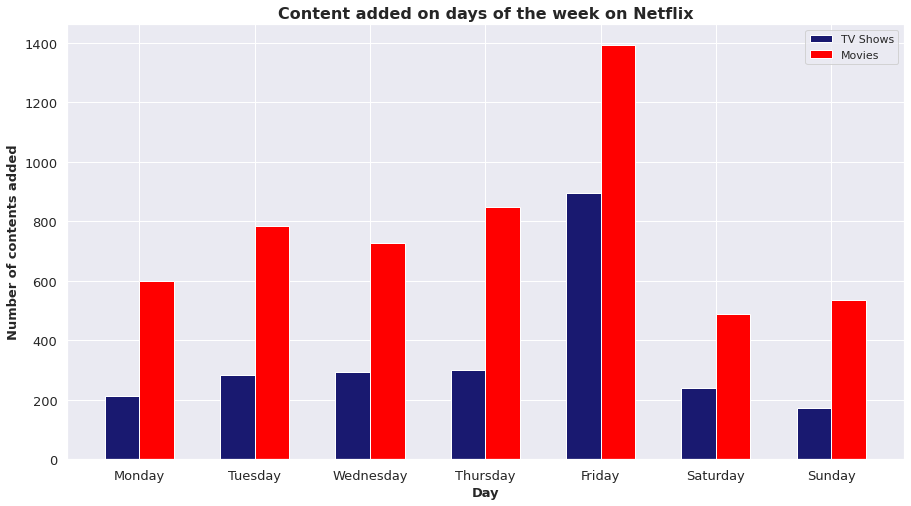

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,8))
x = np.arange(7)
plt.bar(x = x-0.15, 
        height = bar_data['total_tv'],
        width = 0.3,
        color = 'midnightblue')
plt.bar(x = x+0.15,
        height = bar_data['total_movies'],
        width = 0.3,
        color = 'red')
plt.xticks(x, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Content added on days of the week on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Day', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents added', fontsize = 13, fontweight = 'bold')
plt.legend(['TV Shows', 'Movies'])
plt.show();

**Observation:**

Weekends have the lowest number of releases. However, Friday has the highest of all the days of the week. Movies again are larger in number than TV Shows and the trend is almost similar between the two on all the days.

####4.6 What are the popular years of TV series and movies releases?

In [ ]:
# Creating the dataset
# Overall data
release_year_df = df.release_year.value_counts().reset_index().rename(columns={'index':'year','release_year':'total'})
release_year_df['year'] = release_year_df['year'].astype('int')
# TV data
tv_release_year = tv_df.release_year.value_counts().reset_index().rename(columns={'index':'year','release_year':'total_tv'})
tv_release_year['year'] = tv_release_year['year'].astype('int')
# Movies data
movies_release_year = movies_df.release_year.value_counts().reset_index().rename(columns={'index':'year','release_year':'total_movies'})
movies_release_year['year'] = movies_release_year['year'].astype('int')
# Merging the datasets
release_year_df = release_year_df.merge(tv_release_year, on='year')
release_year_df = release_year_df.merge(movies_release_year, on='year')
# Sorting the values
release_year_df = release_year_df.sort_values(by='year').reset_index(drop=True)
release_year_df = release_year_df[release_year_df['year'].isin([x for x in range(1900,2021)])]
line_data = release_year_df

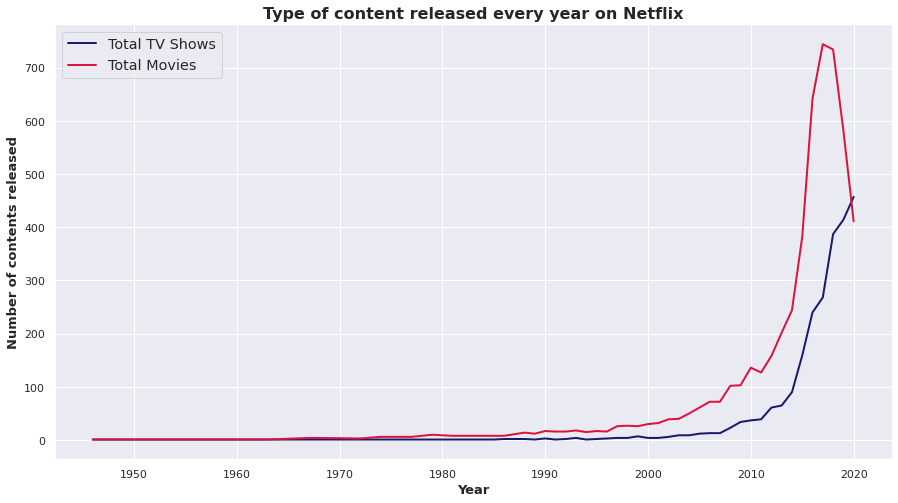

In [ ]:
# Setting the size of the figure
plt.figure(figsize = (15,8))
# Plotting the lines
plt.plot(line_data['year'], line_data['total_tv'], color = 'midnightblue', linewidth = 2)
plt.plot(line_data['year'], line_data['total_movies'], color = 'crimson', linewidth = 2)
# Assigning the labels
plt.ylabel('Number of contents released', fontsize = 13, fontweight = 'bold')
plt.xlabel('Year', fontsize = 13, fontweight = 'bold')
# Adding labels
labels = ['Total TV Shows','Total Movies']
plt.legend(labels = labels, fontsize = 'large')
plt.title('Type of content released every year on Netflix', fontsize = 16, fontweight = "bold")
plt.show();

**Observation:**

Again, the content released graph has very little surprises for us. The focus has shifted a lot on releasing newer TV shows more than movies. So much has the focus shifted that for the first time ever, in 2020, the number of TV shows released surpassed the number of movie releases on Netflix. 

####4.7 What is the distribution of ratings among the contents on Netflix?

In [ ]:
bar_data = df.rating.value_counts().reset_index().rename(columns={'index':'rating','rating':'count'})

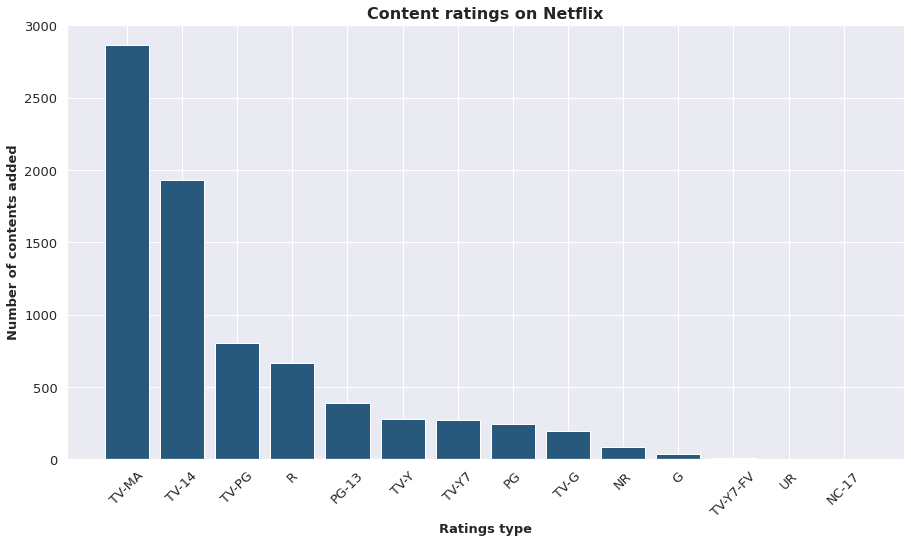

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,8))
plt.bar(x = bar_data['rating'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13, rotation = 45)
plt.yticks(fontsize = 13)
plt.title('Content ratings on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Ratings type', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents added', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

Contents suitable for all are very few in number whereas contents with restrictions like TV-MA (unsuitable for under 17), TV-14 (may be unsuitable for under 14) and TV-PG (unsuitable for young childern) are the three highest in numbers.

####4.8 What is the distribution of the duration of the content on Netflix?

In [ ]:
# Preparing the dataset
tv_duration = tv_df.duration.value_counts().reset_index().rename(columns={'index':'No_of_seasons','duration':'count'})
new = tv_duration['No_of_seasons'].str.split(' ', expand=True)
tv_duration['No_of_seasons'] = new[0]
bar_data = tv_duration

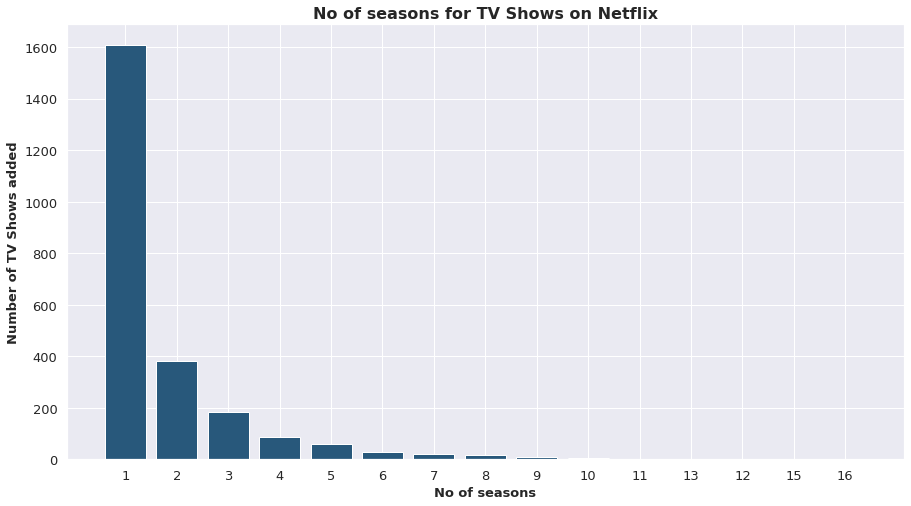

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,8))
plt.bar(x = bar_data['No_of_seasons'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('No of seasons for TV Shows on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('No of seasons', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of TV Shows added', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

A lot of TV Shows (more than 1600) have only one season. Almost 400 have two and there is almost an exponential decrement in the number of TV Shows with even larger number of seasons.

In [ ]:
# Preparing the dataset
new = movies_df.duration.str.split(' ', expand=True)
movies_duration = new[0]
movies_duration = movies_duration.astype('int')
movies_duration = movies_duration.reset_index().rename(columns={0:'No_of_mins'})
movies_duration

index  No_of_mins
0         1          93
1         2          78
2         3          80
3         4         123
4         6          95
...     ...         ...
5372   7781          88
5373   7782          99
5374   7783         111
5375   7784          44
5376   7786          90

[5377 rows x 2 columns]

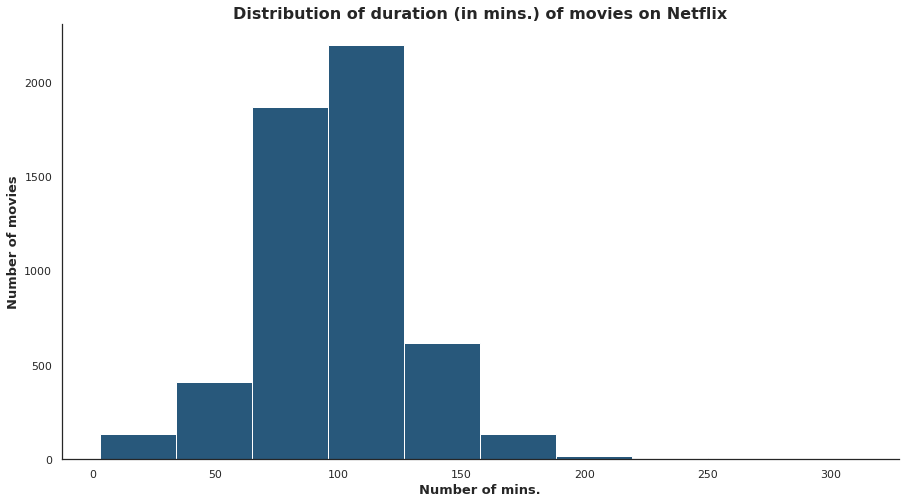

In [ ]:
# Histogram plot
sns.set_style('white')
plt.figure(figsize = (15,8))
plt.hist(movies_duration['No_of_mins'],
         bins = 10,
         color = '#28587B')
plt.title('Distribution of duration (in mins.) of movies on Netflix', fontsize = 16, weight = "bold")
plt.xlabel('Number of mins.', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of movies', fontsize = 13, fontweight = 'bold')
sns.despine()
plt.show();

**Observation:**

A lot of the movies are between 60 to 150 mins long. But there are movies with more than 300+ minutes duration.

####4.9 What is the distribution of genres of the contents on Netflix?

In [ ]:
# Preparing the dataset
genre_df = df['listed_in'].str.split(', ', expand=True).stack()
genre_df = genre_df.value_counts().reset_index().rename(columns={'index':'genre',0:'count'})
bar_data = genre_df.head(10)

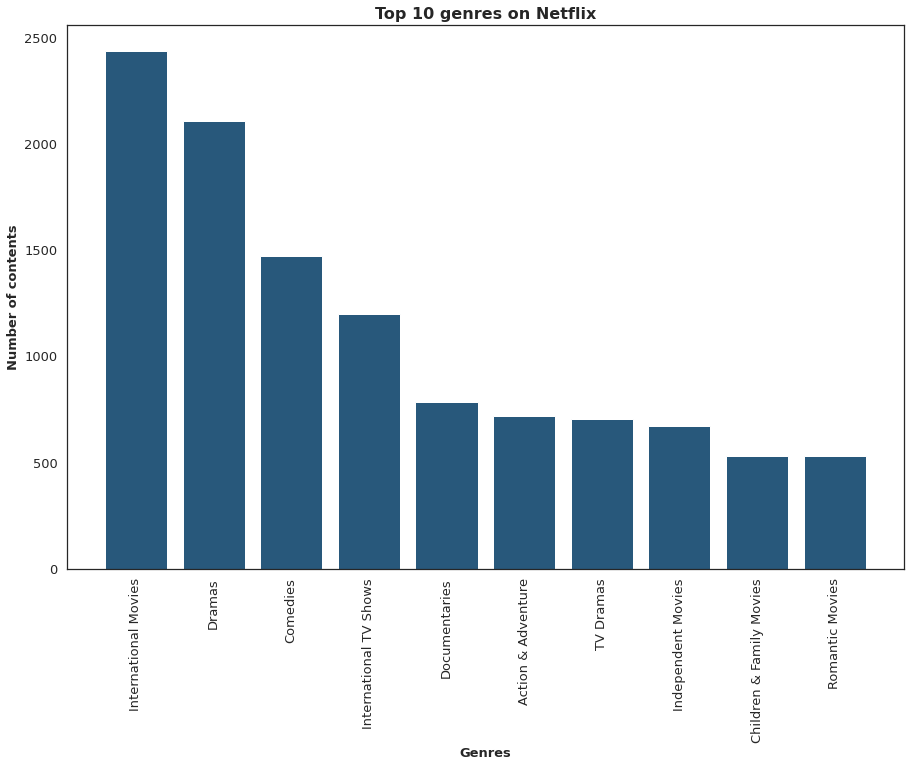

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['genre'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13, rotation = 90)
plt.yticks(fontsize = 13)
plt.title('Top 10 genres on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Genres', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

International TV Shows and International Movies are two of the most dominant genres. Others include Dramas, Comedies, Documentaries and Action & Adventure.

####4.10 Who are the top 10 directors on Netflix?

In [ ]:
# Preparing the dataset
tv_director_df = tv_df.director.str.split(', ', expand=True).stack()
tv_director_df = tv_director_df.value_counts().reset_index().rename(columns={'index':'director',0:'count'})
bar_data = tv_director_df.head(10)

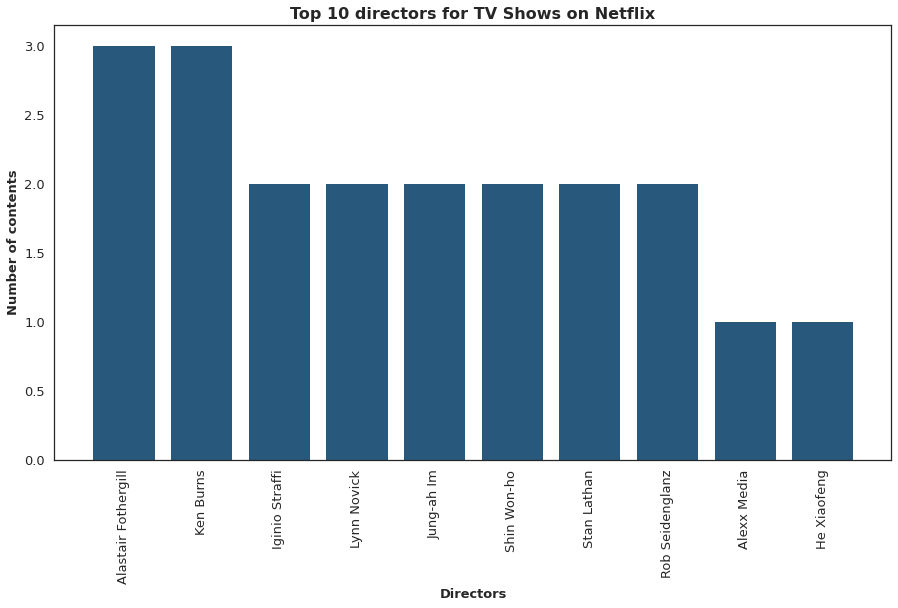

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,8))
plt.bar(x = bar_data['director'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13, rotation = 90)
plt.yticks(fontsize = 13)
plt.title('Top 10 directors for TV Shows on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Directors', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

The top 10 TV shows directors on Netflix doesn't feature directors with more than 3 TV Shows on the streaming service.

In [ ]:
# Preparing the dataset
movies_director_df = movies_df.director.str.split(', ', expand=True).stack()
movies_director_df = movies_director_df.value_counts().reset_index().rename(columns={'index':'director',0:'count'})
bar_data = movies_director_df.head(10)

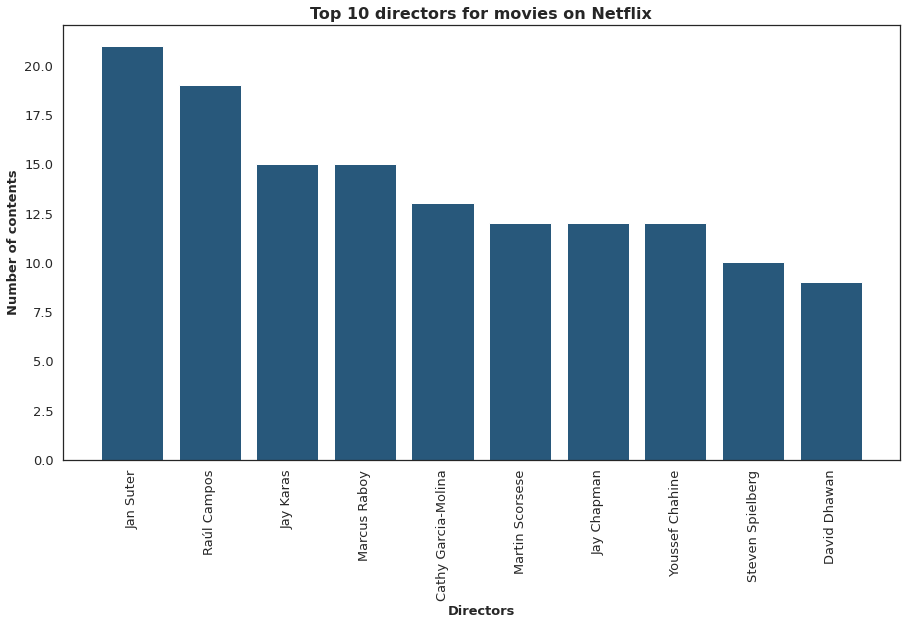

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,8))
plt.bar(x = bar_data['director'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13, rotation = 90)
plt.yticks(fontsize = 13)
plt.title('Top 10 directors for movies on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Directors', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

Some of the biggest names of the industry like Steven Spielberg, Martin Scorsese and Jay Chapman feature in the list of top 10 movie directors on Netflix.

####4.11 Who are the top 10 actors/actress on Netflix?

In [ ]:
# Preparing the dataset
tv_cast_df = tv_df.cast.str.split(', ', expand=True).stack()
tv_cast_df = tv_cast_df.value_counts().reset_index().rename(columns={'index':'actor',0:'count'})
bar_data = tv_cast_df.head(10)

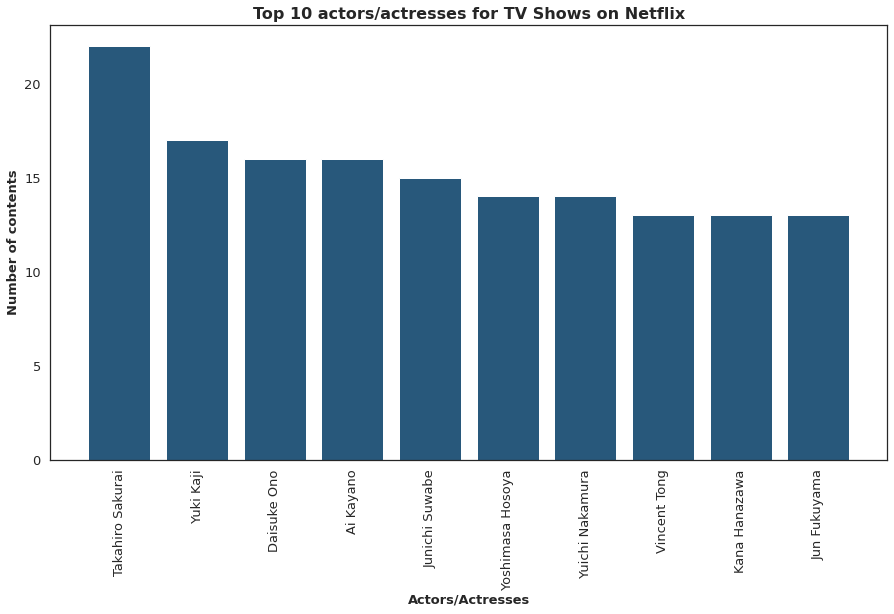

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,8))
plt.bar(x = bar_data['actor'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13, rotation = 90)
plt.yticks(fontsize = 13)
plt.title('Top 10 actors/actresses for TV Shows on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Actors/Actresses', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

A lot of Asian, perhaps East Asian actors feature on the list of top 10 actors/actresses for TV Shows on Netflix.

In [ ]:
# Preparing the dataset
movies_cast_df = movies_df.cast.str.split(', ', expand=True).stack()
movies_cast_df = movies_cast_df.value_counts().reset_index().rename(columns={'index':'actor',0:'count'})
bar_data = movies_cast_df.head(10)

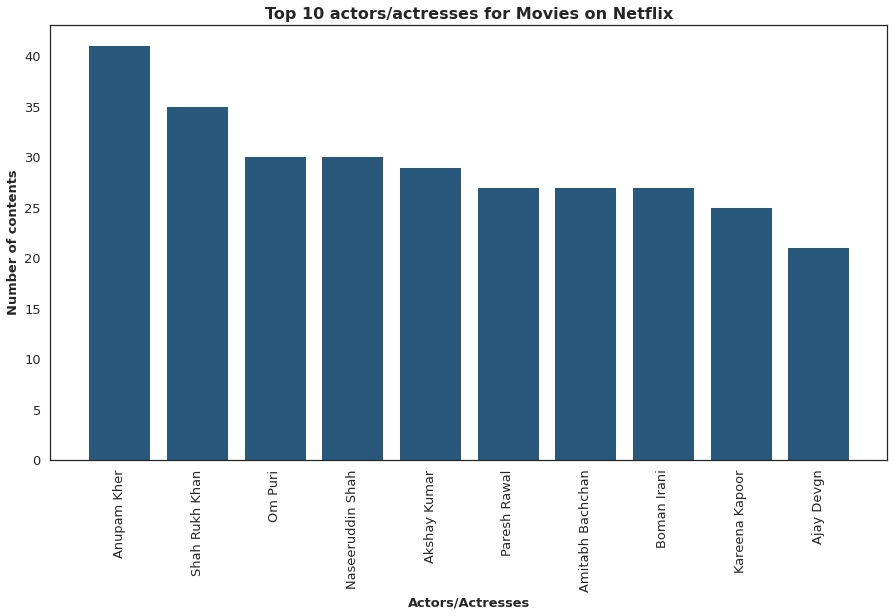

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,8))
plt.bar(x = bar_data['actor'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13, rotation = 90)
plt.yticks(fontsize = 13)
plt.title('Top 10 actors/actresses for Movies on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Actors/Actresses', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

The list is full of A-listers from Bollywood, as expected given the number of movies from India on Netflix.

## ***5. Hypothesis Testing***

In [ ]:
# Creating a copy for hypothesis testing
hypothesis_df = df.copy()

In [ ]:
# Preparing the dataset
hypothesis_df['year_added'] = hypothesis_df['year_added'].astype('object')
hypothesis_df['year_added'] = hypothesis_df['year_added'][:-4]
hypothesis_df['release_year'] = hypothesis_df['release_year'].astype('object')
hypothesis_df['Netflix_Originals'] = np.where(hypothesis_df.year_added==hypothesis_df.release_year, 1, 0)

#### Hypothesis Testing 1 - Checking the relation between Originals and TV ratings

**Null Hypothesis H0:** The kind of content is independent on TV Ratings (Contents aren't restrictive)

**Alternate Hypothesis H1:** There is a dependency and Netflix focuses only on Originals of only certain types of TV Ratings (Netflix Originals are restrictive)

**Test:** Chi-square test

**Significance Level:** 0.05

In [ ]:
# Preparing the contingency table
contingency_table = pd.crosstab(hypothesis_df.Netflix_Originals, hypothesis_df.rating)
contingency_table

rating              G  NC-17  NR   PG  PG-13    R  TV-14  TV-G  TV-MA  TV-PG  \
Netflix_Originals                                                              
0                  33      3  67  206    329  575   1382   114   1395    553   
1                   6      0  17   41     57   90    549    80   1468    253   

rating             TV-Y  TV-Y7  TV-Y7-FV  UR  
Netflix_Originals                             
0                   140    150         5   5  
1                   140    121         1   0

In [ ]:
# Chi-square test
X2, p_value, degree_freedom, expected_values = scipy.stats.chi2_contingency(contingency_table, correction = True)
print("X2: {0}, p-value: {1}".format(X2, p_value))

X2: 661.0557432516437, p-value: 7.198786177322226e-133


**Conclusion:**

Given our very low p-value, we couldn't find enough significant evidence to accept the null hypothesis that there is no difference in the TV ratings for Netflix's original and non-original contents.

#### Hypothesis Testing 2 - Is there a difference in the duration of Netflix Originals movies and the other movies?

**Null Hypothesis H0:** The mean duration for the two are same.

**Alternate Hypothesis H1:** The duration for the two are not same. 

**Test:** z-test

**Significance Level:** 0.05

In [ ]:
# Preparing the dataset
movies = hypothesis_df.copy()
movies = movies[movies.type=='Movie']
movies['mins'] = movies['duration'].str.split(' ', expand=True)[0]
movies['mins'] = movies['mins'].astype('int')
movies_NO = movies[movies.Netflix_Originals==1]
movies_NNO = movies[movies.Netflix_Originals==0]

In [ ]:
movies_NO.dropna(inplace=True)
movies_NNO.dropna(inplace=True)

In [ ]:
# Z-test 
z_statistic, p_value = ztest(movies_NO['mins'], movies_NNO['mins'], value=0) 
print("z-statistic: {0}, p-value: {1}".format(z_statistic, p_value))

z-statistic: -15.877129121894127, p-value: 9.126081077037407e-57


**Conclusion:**

Since the p-value is very low, we once again don't have enough evidence to accept the null hypothesis that the duration of the Netflix Original movies and the other movies are same and hence that they're from same distribution.

## ***6. Feature Engineering & Data Pre-processing***

####Handling Missing Values

show_id                  0
type                     0
title                    0
director              2389
cast                   718
country                507
date_added              10
release_year             0
rating                   7
duration                 0
listed_in                0
description              0
month_added             10
day_of_week_added       10
year_added              10
day_of_month_added      10
date_month_added        10
dtype: int64


<Axes: >

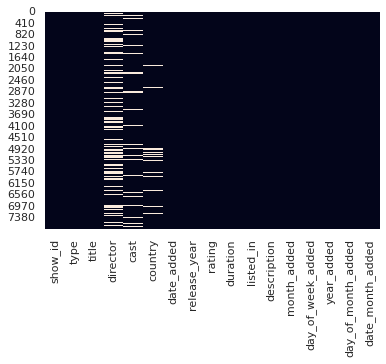

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

Clustering will see a lot of categorical or text-based (object) variables grouped into one big text variable and then worked on. So, we can impute the missing values from director, cast and country with an empty space.

As for date_added and the columns generated using it and the rating column, we will delete the rows with missing values.

In [ ]:
# Deleting and checking again
df = df.dropna(subset = ['date_added', 'rating'])
null_columns = ['director', 'cast', 'country']
df[null_columns] = df[null_columns].fillna(' ')
print(df.isnull().sum())

show_id               0
type                  0
title                 0
director              0
cast                  0
country               0
date_added            0
release_year          0
rating                0
duration              0
listed_in             0
description           0
month_added           0
day_of_week_added     0
year_added            0
day_of_month_added    0
date_month_added      0
dtype: int64


####Handling Outliers

In [ ]:
df.info()
netflix = df.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   show_id             7770 non-null   object        
 1   type                7770 non-null   object        
 2   title               7770 non-null   object        
 3   director            7770 non-null   object        
 4   cast                7770 non-null   object        
 5   country             7770 non-null   object        
 6   date_added          7770 non-null   datetime64[ns]
 7   release_year        7770 non-null   int64         
 8   rating              7770 non-null   object        
 9   duration            7770 non-null   object        
 10  listed_in           7770 non-null   object        
 11  description         7770 non-null   object        
 12  month_added         7770 non-null   float64       
 13  day_of_week_added   7770 non-null   float64     

There are no numeric columns that may have the possibility of having outliers of no importance. And so we are skipping this step. 

####Categorical Encoding

In [ ]:
# Dummy encoding the categorical variables
categorical_columns = ['type', 'rating']
df = pd.get_dummies(df, columns = categorical_columns, drop_first = True)
df.head()

show_id  title           director  \
0      s1     3%                      
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year   duration  \
0 2020-08-14          2020  4 Seasons   
1 2016-12-23          2016     93 min   
2 2018-12-20          2011     78 min   
3 2017-11-16          2009     80 min   
4 2020-01-01          2008    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  ...  rating_PG-13  \
0  In a future where the elite inhabit an island ...  ...             0   
1  After a devastating earthquake hits Mexico Cit...  ...             0   
2  When an army recruit is found dead, his fellow...  ...             0   
3  In a postapocalyptic world, rag-doll robots hi...  ...             1   
4  A brilliant group of students become card-coun...  ...             1   

   rating_R  rating_TV-14  rating_TV-G rating_TV-MA  rating_TV-PG  \
0         0             0            0            1             0   
1         0             0            0            1             0   
2         1             0            0            0             0   
3         0             0            0            0             0   
4         0             0            0            0             0   

   rating_TV-Y  rating_TV-Y7  rating_TV-Y7-FV  rating_UR  
0            0             0                0          0  
1            0             0                0          0  
2            0             0                0          0  
3            0             0                0          0  
4            0             0                0          0  

[5 rows x 29 columns]

We have dummy encoded the two categorical variables (non-text data) that existed and are not to be joined later for the TF-IDF process.

####Data Scaling

In [ ]:
# Selecting the numerical columns and using normalisation process
numerical_columns = ['release_year', 'month_added', 'day_of_week_added', 'year_added', 'day_of_month_added']
mm = MinMaxScaler()
df[numerical_columns] = mm.fit_transform(df[numerical_columns])

####Selecting Columns for Textual Pre-Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   show_id             7770 non-null   object        
 1   title               7770 non-null   object        
 2   director            7770 non-null   object        
 3   cast                7770 non-null   object        
 4   country             7770 non-null   object        
 5   date_added          7770 non-null   datetime64[ns]
 6   release_year        7770 non-null   float64       
 7   duration            7770 non-null   object        
 8   listed_in           7770 non-null   object        
 9   description         7770 non-null   object        
 10  month_added         7770 non-null   float64       
 11  day_of_week_added   7770 non-null   float64       
 12  year_added          7770 non-null   float64       
 13  day_of_month_added  7770 non-null   float64     

In [ ]:
# Joining the text features
df['text'] = df['title'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['duration'] + ' ' + df['listed_in'] + ' ' + df['description']

In [ ]:
# Deleting the unwanted columns
df = df.drop(columns=['show_id', 'date_added', 'date_month_added', 'title', 'director', 'cast', 'country', 'duration', 'listed_in', 'description'])

We joined all the textual data into one column and deleted all the columns we knew are now not relevant with the clustering process.

####Lowering the case and removing stopwords

In [ ]:
# Stopwords in english
stopwords_set = stopwords.words('english')
print(stopwords_set)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Creating a function to lower the case and check if the word is a stopword
# And if not, we add it in the list and then return as string
def lowering_case_removing_stopwords(row):
  row = [word.lower() for word in row.split() if word.lower() not in stopwords_set]
  return ' '.join(row)

# Applying the function to the text column
df['text'] = df['text'].apply(lowering_case_removing_stopwords)

We removed all the stopwords from our text data and also have lowered the case for the words in all the documents of the corpus.

####Removing punctuations

In [ ]:
# Punctuations in english
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# Creating a function to remove all the punctuations from the text
# Replacing them with an empty character
def remove_punctuations(row):
   return row.translate(str.maketrans('','',punctuations))

# Applying the function to the text column
df['text'] = df['text'].apply(remove_punctuations)

We have removed all the punctuations from the text column of the dataset.


####Stemming

In [ ]:
# Stemmer of english language
stemmer = SnowballStemmer('english')

In [ ]:
# Creating a function for stemming the text
def stemming(row):
  row = [stemmer.stem(word) for word in row.split()]
  return ' '.join(row)

# Applying the function to text column
df['text'] = df['text'].apply(stemming)

We have stemmed all the words to their roots from the text column of the dataset.

####Text Vectorisation

In [ ]:
# Text Vectorisation
tf_idf = TfidfVectorizer(stop_words='english', max_features=8000)
df_tf_idf = tf_idf.fit_transform(df['text']).toarray()

We have vectorised the text using the TF-IDF text vectorisation technique.

####Dimensionality Reduction

In [ ]:
# Using PCA to reduce dimensions
pca = PCA(random_state=0)
pca.fit(df_tf_idf)

PCA(random_state=0)

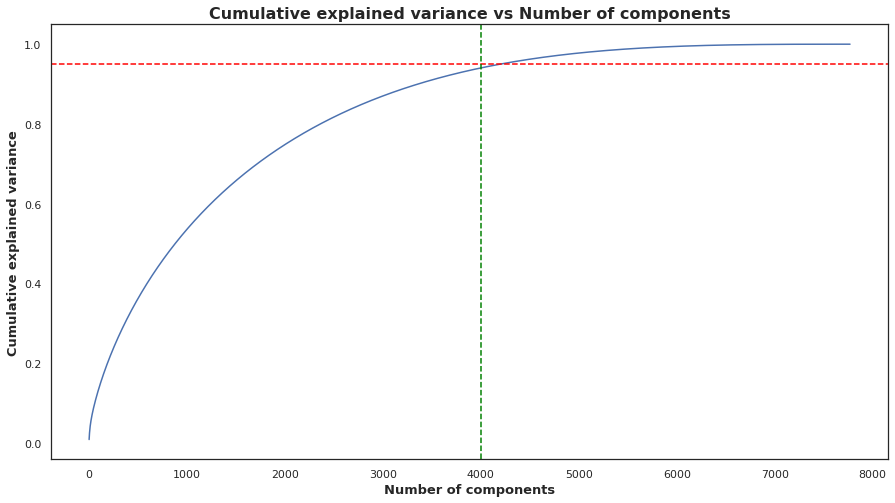

In [ ]:
# Plotting the PCA graph
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative explained variance vs Number of components', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of components', fontsize = 13, fontweight = 'bold')
plt.ylabel('Cumulative explained variance', fontsize = 13, fontweight = 'bold')
plt.axhline(y=0.95, color='red', linestyle='--')
plt.axvline(x=4000, color='green', linestyle='--')
plt.show();

We can see that the first 4000 components explain 95% of the variance and thus we will use only those.

In [ ]:
# Thus fitting only 4000 components
pca = PCA(n_components=0.95, random_state=0)
X = pca.fit_transform(df_tf_idf)

In [ ]:
X.shape

(7770, 4198)

####Final dataset

In [ ]:
# Dropping text column from the dataset
df = df.drop(columns=['text'])

In [ ]:
# Converting the dataframe into array format
df = df.to_numpy()

In [ ]:
# Concatenating the two arrays to prepare the final dataset
X = np.concatenate([df, X], axis=1)

In [ ]:
X.shape

(7770, 4217)

## ***7. ML Model Implementation***

#### ML Model - 1 - **Implementing KMeans Clustering**

In [ ]:
# KMeans Clustering Algorithm Implementation
SSE = []
silhouette_avg = []
# Looping over the number of clusters
for k in range(2,16):
  # Running KMeans on clusters values from 2 to 15
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X)
  # Computing the sum of squared errors
  SSE.append(kmeans.inertia_)
  # Computing the silhouette score
  labels = kmeans.labels_
  score = silhouette_score(X,labels)
  silhouette_avg.append(score)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=5, random_state=0)

KMeans(n_clusters=6, random_state=0)

KMeans(n_clusters=7, random_state=0)

KMeans(random_state=0)

KMeans(n_clusters=9, random_state=0)

KMeans(n_clusters=10, random_state=0)

KMeans(n_clusters=11, random_state=0)

KMeans(n_clusters=12, random_state=0)

KMeans(n_clusters=13, random_state=0)

KMeans(n_clusters=14, random_state=0)

KMeans(n_clusters=15, random_state=0)

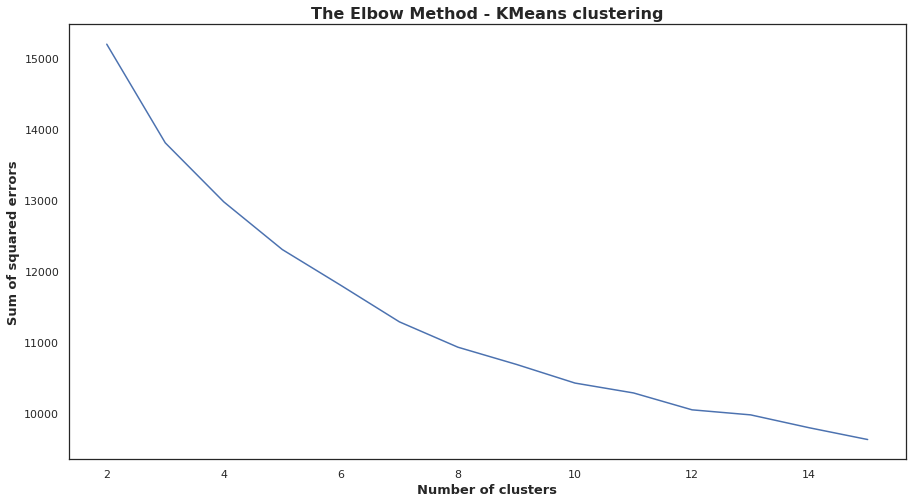

In [ ]:
# Plotting the values of SSE
plt.figure(figsize=(15,8))
plt.plot(range(2,16), SSE)
plt.title('The Elbow Method - KMeans clustering', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of clusters', fontsize = 13, fontweight = 'bold')
plt.ylabel('Sum of squared errors', fontsize = 13, fontweight = 'bold')
plt.show();

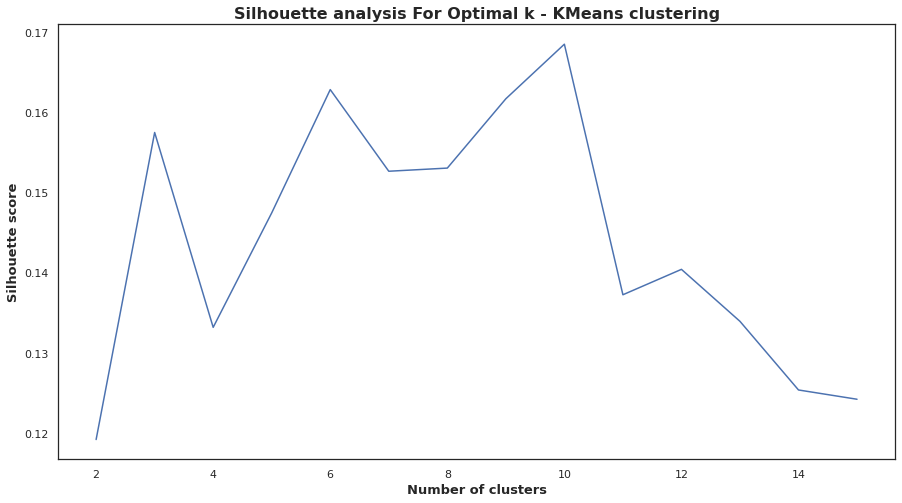

In [ ]:
# Plotting the Silhouette analysis
plt.figure(figsize=(15,8))
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters', fontsize = 13, fontweight = 'bold') 
plt.ylabel('Silhouette score', fontsize = 13, fontweight = 'bold')
plt.title('Silhouette analysis For Optimal k - KMeans clustering', fontsize = 16, fontweight = 'bold')
plt.show();

**Observation:**

The elbow method technically fails in our case as it gives us a very smooth curve. However, from the silhouette score, we can say that 10 is the right number of clusters for our problem.

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=10, random_state=0)  
y_predict = kmeans.fit_predict(X) 

In [ ]:
# Assigning the cluster values to the dataset
netflix['kmeans_cluster'] = y_predict

In [ ]:
# Sampling data from each cluster
for i in range(10):
  sample_df = netflix[netflix.kmeans_cluster==i]
  print()
  print('=============================================')
  print(f'Sample from cluser {i}')
  print()
  sample_df.sample(10)


Sample from cluser 0



show_id   type                           title            director  \
890     s891  Movie                        Bheeshma      Venky Kudumula   
1971   s1972  Movie                           Elena         Petra Costa   
5306   s5307  Movie                  Running Shaadi            Amit Roy   
2133   s2134  Movie                           Fatso        Rajat Kapoor   
2095   s2096  Movie                      Fall Girls        Chris Stokes   
6221   s6222  Movie              The Cincinnati Kid      Norman Jewison   
247     s248  Movie         A Very Murray Christmas       Sofia Coppola   
3780   s3781  Movie  Love You to the Stars and Back  Antoinette Jadaone   
3658   s3659  Movie            Little Dragon Maiden            Hua Shan   
3633   s3634  Movie               Life's Speed Bump          Wael Ehsan   

                                                   cast  \
890   Nitin Reddy, Rashmika Mandanna, Sampath Raj, J...   
1971                                                      
5306  Amit Sadh, Tapsee Pannu, Arsh Bajwa, Brijendra...   
2133  Ranvir Shorey, Gul Panag, Purab Kohli, Neil Bh...   
2095  Amara La Negra, Erica Hubbard, Joely Fisher, P...   
6221  Steve McQueen, Edward G. Robinson, Ann-Margret...   
247   Bill Murray, Miley Cyrus, George Clooney, Chri...   
3780  Julia Barretto, Joshua Garcia, Carmina Villaro...   
3658  Leslie Cheung, Jing-Jing Yung, Chen Kuan-tai, ...   
3633  Ahmed Helmy, Nour, Ezzat Abou Aouf, Ahmed Rate...   

                    country date_added  release_year rating duration  \
890                   India 2020-04-25          2020  TV-14  138 min   
1971  Brazil, United States 2019-09-01          2012  TV-14   81 min   
5306                  India 2018-04-30          2017  TV-14  115 min   
2133                  India 2019-02-15          2012  TV-14   97 min   
2095          United States 2020-01-01          2019  TV-14   80 min   
6221          United States 2019-11-01          1965  TV-14  103 min   
247           United States 2015-12-04          2015  TV-14   57 min   
3780            Philippines 2020-12-17          2017  TV-14  111 min   
3658              Hong Kong 2018-08-01          1983  TV-14   92 min   
3633                  Egypt 2020-06-02          2006  TV-14  109 min   

                                              listed_in  \
890   Action & Adventure, Comedies, International Mo...   
1971                Documentaries, International Movies   
5306    Comedies, International Movies, Romantic Movies   
2133             Comedies, Dramas, International Movies   
2095                                           Comedies   
6221                             Classic Movies, Dramas   
247                          Comedies, Music & Musicals   
3780    Comedies, International Movies, Romantic Movies   
3658  Action & Adventure, International Movies, Roma...   
3633                     Comedies, International Movies   

                                            description  month_added  \
890   Tired of being single, a smart-aleck meme crea...         4.00   
1971  In this documentary, the director remembers a ...         9.00   
5306  A Bihari migrant runs a successful service to ...         4.00   
2133  Killed too soon due to a clerical error in hea...         2.00   
2095  Following a night of hard partying that left t...         1.00   
6221  In Depression-era New Orleans, cocksure stud p...        11.00   
247   Bill Murray rounds up an all-star cast for an ...        12.00   
3780  In search of aliens, a young woman's road trip...        12.00   
3658  Seeking to improve his combat skills, a young ...         8.00   
3633  Seeking job opportunities, a young man arrives...         6.00   

      day_of_week_added  year_added  day_of_month_added date_month_added  \
890                5.00     2020.00               25.00   25-04 00:00:00   
1971               6.00     2019.00                1.00   01-09 00:00:00   
5306               0.00     2018.00               30.00   30-04 0


Sample from cluser 1



show_id   type                                           title  \
4703   s4704  Movie                                 Out of Thin Air   
2122   s2123  Movie                 Fat Ballerina - David A. Arnold   
93       s94  Movie                               27: Gone Too Soon   
6391   s6392  Movie                             The Ghost Who Walks   
1395   s1396  Movie                                 Circus of Books   
4066   s4067  Movie                                         Michael   
5875   s5876  Movie                              Suicide (Hitabdut)   
4870   s4871  Movie                              Pizza, birra, faso   
5270   s5271  Movie  Ron White: If You Quit Listening, I'll Shut Up   
1788   s1789  Movie                                             DNA   

                                   director  \
4703                           Dylan Howitt   
2122                        Milton Horowitz   
93                        Simon Napier-Bell   
6391                            Cody Stokes   
1395                           Rachel Mason   
4066                         Ribhu Dasgupta   
5875                          Benny Fredman   
4870  Israel Adrián Caetano, Bruno Stagnaro   
5270                            Tom Forrest   
1788                                Maïwenn   

                                                   cast          country  \
4703                                                                       
2122                                    David A. Arnold    United States   
93    Janis Joplin, Jimi Hendrix, Amy Winehouse, Jim...   United Kingdom   
6391  Garland Scott, Frank Mosley, Alexia Rasmussen,...    United States   
1395                                                       United States   
4066  Naseeruddin Shah, Mahie Gill, Sabyasachi Chakr...            India   
5875     Mali Levi, Rotem Keinan, Dror Keren, Igal Naor           Israel   
4870  Héctor Anglada, Jorge Sesán, Pamela Jordán, Ad...        Argentina   
5270                                          Ron White    United States   
1788  Maïwenn, Fanny Ardant, Louis Garrel, Dylan Rob...  France, Algeria   

     date_added  release_year rating duration  \
4703 2017-09-29          2017  TV-MA   85 min   
2122 2020-03-02          2020  TV-MA   61 min   
93   2018-05-01          2017  TV-MA   70 min   
6391 2020-04-07          2019  TV-MA  107 min   
1395 2020-04-22          2020  TV-MA   87 min   
4066 2020-07-05          2011  TV-MA   86 min   
5875 2016-07-01          2014  TV-MA  114 min   
4870 2018-03-15          1998  TV-MA   81 min   
5270 2018-10-16          2018  TV-MA   63 min   
1788 2020-12-26          2020  TV-MA   91 min   

                                             listed_in  \
4703               Documentaries, International Movies   
2122                                   Stand-Up Comedy   
93                                       Documentaries   
6391             Dramas, Independent Movies, Thrillers   
1395                       Documentaries, LGBTQ Movies   
4066  Dramas, Independent Movies, International Movies   
5875                   International Movies, Thrillers   
4870                      Dramas, International Movies   
5270                                   Stand-Up Comedy   
1788                      Dramas, International Movies   

                                            description  month_added  \
4703  Picking up 40 years after six were convicted f...         9.00   
2122  Finally comfortable in his skin, seasoned comi...         3.00   
93    Explore the circumstances surrounding the trag...         5.00   
6391  Desperate to meet his daughter, a convict cuts...         4.00   
1395  For decades, a nice Jewish couple ran Circus o...         4.00   
4066  After a dedicated cop accidentally kills a 12-...         7.00   
5875  A failed businessman must kill himself to pay ...         7.00   
4870  A group of hardscrabble young thieves in Argen...         3.00   
5270  Ron “Tater Salad” White dishes out 


Sample from cluser 2



show_id     type                            title director  \
2451   s2452  TV Show                        God Eater            
5725   s5726  TV Show                       Soul Eater            
6582   s6583  TV Show          The Legend of Bruce Lee            
7581   s7582  TV Show             When I See You Again            
2441   s2442  TV Show                          Glow Up            
7143   s7144  TV Show                Tomorrow with You            
724     s725  TV Show  Bangkok Love Stories: Innocence            
2751   s2752  TV Show                      History 101            
5609   s5610  TV Show                 Silvana Sin Lana            
3475   s3476  TV Show                Kurt Seyit & Sura            

                                                   cast         country  \
2451  Ryuichi Kijima, Hiroaki Hirata, Kazuya Nakai, ...           Japan   
5725  Chiaki Omigawa, Laura Bailey, Emiri Kato, Kouk...           Japan   
6582  Danny Chan, Michelle Lang, Ted Duran, Hazen Ma...           China   
7581  Jasper Liu, Mandy Wei, Jet Chao, Ivy Shao, Tin...          Taiwan   
2441                                                     United Kingdom   
7143  Shin Mina, Lee Je-hoon, Kim Ye-won, Cho Han-ch...     South Korea   
724   Nida Patcharaveerapong, Nicole Theriault, Natt...        Thailand   
2751                                                     United Kingdom   
5609  Maritza Rodríguez, Carlos Ponce, Marimar Vega,...   United States   
3475  Kıvanç Tatlıtuğ, Farah Zeynep Abdullah, Fahriy...          Turkey   

     date_added  release_year rating   duration  \
2451 2019-07-15          2015  TV-14   1 Season   
5725 2020-01-16          2008  TV-14   1 Season   
6582 2017-07-07          2008  TV-14   1 Season   
7581 2016-10-01          2015  TV-14   1 Season   
2441 2020-08-14          2020  TV-14  2 Seasons   
7143 2019-10-30          2017  TV-14   1 Season   
724  2019-07-31          2018  TV-14   1 Season   
2751 2020-05-22          2020  TV-14   1 Season   
5609 2018-11-17          2016  TV-14   1 Season   
3475 2016-12-26          2014  TV-14   1 Season   

                                              listed_in  \
2451               Anime Series, International TV Shows   
5725               Anime Series, International TV Shows   
6582  International TV Shows, TV Action & Adventure,...   
7581  International TV Shows, Romantic TV Shows, TV ...   
2441  British TV Shows, International TV Shows, Real...   
7143  International TV Shows, Korean TV Shows, Roman...   
724   International TV Shows, Romantic TV Shows, TV ...   
2751  British TV Shows, Docuseries, International TV...   
5609  Romantic TV Shows, Spanish-Language TV Shows, ...   
3475  International TV Shows, Romantic TV Shows, TV ...   

                                            description  month_added  \
2451  An enemy immune to conventional arms has cause...         7.00   
5725  Maka and the other students at the Death Weapo...         1.00   
6582  The brief but spectacular career of martial ar...         7.00   
7581  On a visit to his hometown, a rich bachelor se...        10.00   
2441  In this competition show, aspiring makeup arti...         8.00   
7143  The head of a real estate firm with the abilit...        10.00   
724   From a teenage parkour enthusiast to a bawdy r...         7.00   
2751  Infographics and archival footage deliver bite...         5.00   
5609  When her fugitive husband leaves her homeless ...        11.00   
3475  A Turkish lieutenant and the daughter of Russi...        12.00   

      day_of_week_added  year_added  day_of_month_added date_month_added  \
2451               0.00     2019.00               15.00   15-07 00:00:00   
5725               3.00     2020.00               16.00   16-01 00:00:00   
6582               4.00     2017.00                7.00   07-07 00:00:00   
7581               5.00     2016.00                1.00   01-10 00:00:00   
2441               4.00     2020.00               14.00 


Sample from cluser 3



show_id     type                                     title  \
3531   s3532  TV Show  Larry Charles' Dangerous World of Comedy   
1728   s1729  TV Show                          Devilman Crybaby   
558     s559  TV Show          Apache: The Life of Carlos Tevez   
669     s670  TV Show                             Baby Ballroom   
5489   s5490  TV Show                            Selling Sunset   
7779   s7780  TV Show                                 Zona Rosa   
1050   s1051  TV Show                                Bordertown   
1781   s1782  TV Show                                Disjointed   
1629   s1630  TV Show                            Dave Chappelle   
2832   s2833  TV Show                            House of Cards   

           director                                               cast  \
3531                                                     Larry Charles   
1728  Masaaki Yuasa  Kouki Uchiyama, Ayumu Murase, Megumi Han, Ami ...   
558                  Balthazar Murillo, Vanesa González, Alberto Aj...   
669                                       Warren Bullock, Jane Bullock   
5489                                                                     
7779                 Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...   
1050                 Ville Virtanen, Matleena Kuusniemi, Anu Sinisa...   
1781                 Kathy Bates, Aaron Moten, Tone Bell, Dougie Ba...   
1629    Stan Lathan                                     Dave Chappelle   
2832                 Kevin Spacey, Robin Wright, Kate Mara, Corey S...   

              country date_added  release_year rating   duration  \
3531                  2019-02-15          2019  TV-MA   1 Season   
1728            Japan 2018-01-05          2018  TV-MA   1 Season   
558         Argentina 2019-08-16          2019  TV-MA   1 Season   
669    United Kingdom 2018-07-10          2018  TV-MA  2 Seasons   
5489                  2020-08-07          2020  TV-MA  3 Seasons   
7779           Mexico 2019-11-26          2019  TV-MA   1 Season   
1050  Finland, France 2020-05-11          2019  TV-MA  3 Seasons   
1781    United States 2018-01-12          2018  TV-MA  2 Seasons   
1629    United States 2017-03-21          2017  TV-MA   1 Season   
2832    United States 2018-11-02          2018  TV-MA  6 Seasons   

                                              listed_in  \
3531                            Docuseries, TV Comedies   
1728    Anime Series, International TV Shows, TV Horror   
558   Crime TV Shows, International TV Shows, Spanis...   
669   British TV Shows, International TV Shows, Real...   
5489                                         Reality TV   
7779  International TV Shows, Spanish-Language TV Sh...   
1050  Crime TV Shows, International TV Shows, TV Dramas   
1781                                        TV Comedies   
1629          Stand-Up Comedy & Talk Shows, TV Comedies   
2832                            TV Dramas, TV Thrillers   

                                            description  month_added  \
3531  Legendary comedy writer and director Larry Cha...         2.00   
1728  With demons reawakened and humanity in turmoil...         1.00   
558   This gritty dramatization of the life of Carlo...         8.00   
669   Step into the cutthroat world of kids' ballroo...         7.00   
5489  The elite real estate brokers at The Oppenheim...         8.00   
7779  An assortment of talent takes the stage for a ...        11.00   
1050  A gifted detective takes a job in a small town...         5.00   
1781  Pot activist Ruth Whitefeather Feldman runs a ...         1.00   
1629  Comedy icon Dave Chappelle makes his triumphan...         3.00   
2832  A ruthless politician will stop at nothing to ...        11.00   

      day_of_week_added  year_added  day_of_month_added date_month_added  \
3531               4.00     2019.00               15.00   15-02 00:00:00   
1728               4.00     2018.00                5.00   05-01 00:00:00   
558                4.00     2019


Sample from cluser 4



show_id   type                                              title  \
2357   s2358  Movie                               Garfield's Pet Force   
4727   s4728  Movie                     Pablo Escobar: Angel or Demon?   
62       s63  Movie                                         13 Cameras   
486     s487  Movie                 An American Tail: Fievel Goes West   
2455   s2456  Movie                God's Not Dead: A Light in Darkness   
6489   s6490  Movie                         The Indian in the Cupboard   
6776   s6777  Movie                                    The Prince & Me   
5903   s5904  Movie             Super Monsters: Vida's First Halloween   
1858   s1859  Movie  Dragons: Rescue Riders: Hunt for the Golden Dr...   
6355   s6356  Movie                               The First Wives Club   

                         director  \
2357              Mark A.Z. Dippé   
4727                Jorge Granier   
62                 Victor Zarcoff   
486   Phil Nibbelink, Simon Wells   
2455                Michael Mason   
6489                     Frank Oz   
6776              Martha Coolidge   
5903      Jacob Joice, Steve Ball   
1858     TJ Sullivan, Greg Rankin   
6355                  Hugh WIlson   

                                                   cast  \
2357  Frank Welker, Vanessa Marshall, Gregg Berger, ...   
4727                                                      
62    PJ McCabe, Brianne Moncrief, Sarah Baldwin, Ji...   
486   Philip Glasser, James Stewart, Erica Yohn, Cat...   
2455  David A.R. White, John Corbett, Shane Harper, ...   
6489  Hal Scardino, Litefoot, Lindsay Crouse, Richar...   
6776  Julia Stiles, Luke Mably, Ben Miller, Miranda ...   
5903  Gigi Saul Guerrero, Elyse Maloway, Vincent Ton...   
1858  Noah Kaye Bentley, Brennley Brown, Zach Callis...   
6355  Bette Midler, Goldie Hawn, Diane Keaton, Maggi...   

                            country date_added  release_year rating duration  \
2357     South Korea, United States 2020-01-01          2009      G   78 min   
4727            Venezuela, Colombia 2018-03-23          2007     NR   82 min   
62                    United States 2016-08-13          2015     NR   90 min   
486                   United States 2018-04-01          1991      G   75 min   
2455                  United States 2018-12-04          2018     PG  106 min   
6489                  United States 2020-11-01          1995     PG   96 min   
6776  United States, Czech Republic 2020-10-01          2004     PG  111 min   
5903                  United States 2019-10-04          2019   TV-Y   24 min   
1858                  United States 2020-03-27          2020   TV-Y   46 min   
6355                  United States 2019-11-20          1996     PG  103 min   

                                         listed_in  \
2357            Children & Family Movies, Comedies   
4727           Documentaries, International Movies   
62    Horror Movies, Independent Movies, Thrillers   
486                       Children & Family Movies   
2455                  Dramas, Faith & Spirituality   
6489              Children & Family Movies, Dramas   
6776                     Comedies, Romantic Movies   
5903                      Children & Family Movies   
1858            Children & Family Movies, Comedies   
6355                                      Comedies   

                                            description  month_added  \
2357  When an alien menace and her army of undead mi...         1.00   
4727  This documentary traces the steps of druglord ...         3.00   
62    Young parents-to-be Claire and Ryan move into ...         8.00   
486   Fievel and his family head west for what turns...         4.00   
2455  After a fire breaks out at his church, a pasto...        12.00   
6489  A boy receives a wooden cupboard, antique keys...        11.00   
6776  A hardworking Wisconsin college student falls ...        10.00   
5903  The Super Monsters share their Halloween tradi...        10.00   
1858  It


Sample from cluser 5



show_id   type                           title  \
3387   s3388  Movie  Killer Klowns from Outer Space   
2390   s2391  Movie                  Getting Played   
1837   s1838  Movie                        Dovlatov   
2009   s2010  Movie                    Enola Holmes   
3314   s3315  Movie                  Kate & Leopold   
6869   s6870  Movie                      The Signal   
5118   s5119  Movie                      Real Steel   
5798   s5799  Movie                 Starsky & Hutch   
297     s298  Movie             Across the Universe   
5632   s5633  Movie                     Singularity   

                         director  \
3387               Stephen Chiodo   
2390                David Silberg   
1837               Aleksey German   
2009               Harry Bradbeer   
3314                James Mangold   
6869  William Eubank, Will Eubank   
5118                   Shawn Levy   
5798                Todd Phillips   
297                  Julie Taymor   
5632                 Robert Kouba   

                                                   cast  \
3387  Grant Cramer, Suzanne Snyder, John Allen Nelso...   
2390  Carmen Electra, Stacey Dash, Vivica A. Fox, Bi...   
1837  Milan Maric, Danila Kozlovsky, Helena Sujecka,...   
2009  Millie Bobby Brown, Henry Cavill, Sam Claflin,...   
3314  Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...   
6869  Brenton Thwaites, Olivia Cooke, Laurence Fishb...   
5118  Hugh Jackman, Dakota Goyo, Evangeline Lilly, A...   
5798  Ben Stiller, Owen Wilson, Vince Vaughn, Juliet...   
297   Evan Rachel Wood, Jim Sturgess, Joe Anderson, ...   
5632  Julian Schaffner, John Cusack, Jeannine Wacker...   

                            country date_added  release_year rating duration  \
3387                  United States 2020-04-01          1988  PG-13   86 min   
2390                  United States 2019-11-01          2005  PG-13   85 min   
1837         Russia, Poland, Serbia 2018-10-26          2018  PG-13  126 min   
2009                 United Kingdom 2020-09-23          2020  PG-13  124 min   
3314                  United States 2020-01-01          2001  PG-13  118 min   
6869                  United States 2018-07-13          2014  PG-13   97 min   
5118           United States, India 2020-09-24          2011  PG-13  127 min   
5798                  United States 2019-07-01          2004  PG-13  101 min   
297   United States, United Kingdom 2019-01-01          2007  PG-13  133 min   
5632     Switzerland, United States 2018-06-01          2017  PG-13   92 min   

                                              listed_in  \
3387               Comedies, Cult Movies, Horror Movies   
2390                          Comedies, Romantic Movies   
1837                       Dramas, International Movies   
2009  Action & Adventure, Children & Family Movies, ...   
3314                          Comedies, Romantic Movies   
6869                        Sci-Fi & Fantasy, Thrillers   
5118  Action & Adventure, Sci-Fi & Fantasy, Sports M...   
5798                       Action & Adventure, Comedies   
297           Dramas, Music & Musicals, Romantic Movies   
5632       Action & Adventure, Dramas, Sci-Fi & Fantasy   

                                            description  month_added  \
3387  An alien band of killer clowns descends from t...         4.00   
2390  Tired of dealing with boyfriends who wrong the...        11.00   
1837  Over six days in 1971, brilliant writer Sergei...        10.00   
2009  While searching for her missing mother, intrep...         9.00   
3314  A present-day woman takes responsibility for g...         1.00   
6869  During their drive across the country, college...         7.00   
5118  A struggling fighter-turned-promoter reconnect...         9.00   
5798  New undercover cop partners Starsky and Hutch ...         7.00   
297   An American girl and a British lad fall in lov...         1.00   
5632  Nearly a century after artificial intelligence...         6.00   

      day_of_week


Sample from cluser 6



show_id     type                                              title  \
5058   s5059    Movie                                         Radiopetti   
884     s885    Movie                  Bhai: Vyakti Ki Valli - Uttarardh   
7767   s7768  TV Show                                 Zindagi Gulzar Hai   
1121   s1122    Movie  Bruno and Boots: This Can't Be Happening at Ma...   
3554   s3555    Movie                              Le serment des Hitler   
5391   s5392    Movie                                           Sarajevo   
1399   s1400  TV Show                                    City in the Sky   
6469   s6470    Movie  The Human Factor: The Untold Story of the Bomb...   
894     s895    Movie                                        Bibi & Tina   
7072   s7073    Movie                                        Thunderbolt   

                         director  \
5058               Hari Viswanath   
884              Mahesh Manjrekar   
7767                                
1121           Vivieno Caldinelli   
3554               Emmanuel Amara   
5391            Andreas Prochaska   
1399                                
6469      Rudradeep Bhattacharjee   
894                   Detlev Buck   
7072  William Wyler, John Sturges   

                                                   cast  \
5058  Lakshmanan, TVV Ramanujam, Shobana, Nivas Adit...   
884   Sagar Deshmukh, Iravati Harshe, Vijay Kenkre, ...   
7767  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...   
1121  Jonny Gray, Callan Potter, Peter Keleghan, Car...   
3554                                                      
5391  Florian Teichtmeister, Heino Ferch, Melika For...   
1399                                                      
6469                                                      
894   Lina Larissa Strahl, Lisa-Marie Koroll, Louis ...   
7072                       James Stewart, Lloyd Bridges   

                      country date_added  release_year rating  duration  \
5058                    India 2017-01-01          2015  TV-PG    83 min   
884                     India 2020-09-10          2019  TV-PG   112 min   
7767                 Pakistan 2016-12-15          2012  TV-PG  1 Season   
1121                   Canada 2017-06-24          2017  TV-PG    90 min   
3554                   France 2019-05-01          2014  TV-PG    54 min   
5391  Austria, Czech Republic 2017-01-15          2014  TV-PG    98 min   
1399           United Kingdom 2017-10-01          2016  TV-PG  1 Season   
6469                    India 2017-04-01          2013  TV-PG    53 min   
894                   Germany 2017-04-15          2014  TV-PG    97 min   
7072            United States 2017-03-31          1947  TV-PG    42 min   

                                              listed_in  \
5058                       Dramas, International Movies   
884                        Dramas, International Movies   
7767  International TV Shows, Romantic TV Shows, TV ...   
1121                 Children & Family Movies, Comedies   
3554                Documentaries, International Movies   
5391                       Dramas, International Movies   
1399  British TV Shows, Docuseries, Science & Nature TV   
6469  Documentaries, International Movies, Music & M...   
894          Children & Family Movies, Music & Musicals   
7072                      Classic Movies, Documentaries   

                                            description  month_added  \
5058  An elderly, hearing-impaired Indian man stays ...         1.00   
884   The second installment of P.L. Deshpande’s bio...         9.00   
7767  Strong-willed, middle-class Kashaf and carefre...        12.00   
1121  The biggest troublemakers at Macdonald Hall ar...         6.00   
3554  This documentary retraces the footsteps of Ado...         5.00   
5391  Tasked with unraveling the assassination of Ar...         1.00   
1399  This series explores the magnitude and scale o...        10.00   
6469  A family of Parsi musicians collectively works...   


Sample from cluser 7



show_id   type                           title  \
2812   s2813  Movie                      Horse Girl   
1722   s1723  Movie                          Detour   
5420   s5421  Movie                        Say When   
466     s467  Movie              American History X   
7229   s7230  Movie                   Triple Threat   
183     s184  Movie                 A Haunted House   
120     s121  Movie                          5 to 7   
2135   s2136  Movie  Fear and Loathing in Las Vegas   
6719   s6720  Movie                   The Old Guard   
2420   s2421  Movie                            Girl   

                             director  \
2812                       Jeff Baena   
1722                Christopher Smith   
5420                     Lynn Shelton   
466                         Tony Kaye   
7229  Jesse V. Johnson, Jesse Johnson   
183                    Michael Tiddes   
120                      Victor Levin   
2135                    Terry Gilliam   
6719            Gina Prince-Bythewood   
2420                      Lukas Dhont   

                                                   cast  \
2812  Alison Brie, Debby Ryan, Paul Reiser, John Rey...   
1722  Tye Sheridan, Bel Powley, Emory Cohen, Gbenga ...   
5420  Keira Knightley, Chloë Grace Moretz, Sam Rockw...   
466   Edward Norton, Edward Furlong, Beverly D'Angel...   
7229  Tony Jaa, Iko Uwais, Tiger Chen, Scott Adkins,...   
183   Marlon Wayans, Essence Atkins, Cedric the Ente...   
120   Anton Yelchin, Bérénice Marlohe, Olivia Thirlb...   
2135  Johnny Depp, Benicio Del Toro, Tobey Maguire, ...   
6719  Charlize Theron, KiKi Layne, Marwan Kenzari, L...   
2420  Victor Polster, Arieh Worthalter, Oliver Bodar...   

                             country date_added  release_year rating duration  \
2812                   United States 2020-02-07          2020      R  104 min   
1722    United Kingdom, South Africa 2017-05-25          2016      R   97 min   
5420                   United States 2018-07-19          2014      R   99 min   
466                    United States 2019-11-01          1998      R  119 min   
7229  Thailand, China, United States 2019-06-22          2019      R   96 min   
183                    United States 2020-02-21          2013      R   86 min   
120                    United States 2017-03-16          2014      R   97 min   
2135                   United States 2019-11-01          1998      R  118 min   
6719                   United States 2020-07-10          2020      R  126 min   
2420            Netherlands, Belgium 2019-03-15          2018      R  106 min   

                                       listed_in  \
2812                  Dramas, Independent Movies   
1722                                   Thrillers   
5420        Comedies, Dramas, Independent Movies   
466                                       Dramas   
7229    Action & Adventure, International Movies   
183                      Comedies, Horror Movies   
120            Comedies, Dramas, Romantic Movies   
2135               Comedies, Cult Movies, Dramas   
6719                          Action & Adventure   
2420  Dramas, International Movies, LGBTQ Movies   

                                            description  month_added  \
2812  A sweet misfit with a fondness for crafts, hor...         2.00   
1722  Convinced his stepfather caused the crash that...         5.00   
5420  Desperately clinging to her youth, 28-year-old...         7.00   
466   A neo-Nazi gets sent to prison for murder and ...        11.00   
7229  A crew of ruthless criminals hired to kill an ...         6.00   
183   This spoof on scary movies follows a young cou...         2.00   
120   A young novelist's life is turned upside down ...         3.00   
2135  A sportswriter and his Samoan lawyer embark on...        11.00   
6719  Four undying warriors who've secretly protecte...         7.00   
2420  Fifteen-year-old ballet dancer Lara faces phys...         3.00   

      day_of_week_added  year_added  da


Sample from cluser 8



show_id     type                           title director  \
6707   s6708  TV Show                   The Next Step            
5513   s5514  TV Show                    Seven and Me            
5734   s5735  TV Show                    Space Jungle            
1073   s1074  TV Show                     Brain Games            
5885   s5886  TV Show                   Sunny Bunnies            
6076   s6077  TV Show  The American Barbecue Showdown            
4999   s5000  TV Show                     Puffin Rock            
4346   s4347  TV Show              My Perfect Landing            
4571   s4572  TV Show                         Oddbods            
2498   s2499  TV Show                      Goosebumps            

                                                   cast  \
6707  Shamier Anderson, Victoria Baldesarra, Alexand...   
5513      Leila Jolene, Flavio Parenti, Josefin Asplund   
5734          Kim Min-hee, Park Yoon-hee, Sun Sung-wook   
1073                                        Jason Silva   
5885             Svetlana Tsimokhina, Dmitri Davidovich   
6076                         Lyric Lewis, Rutledge Wood   
4999  Chris O'Dowd, Kate McCafferty, Sally McDaid, G...   
4346  Morgan Wigle, Tom Hulshof, Helena Marie, Shawn...   
4571  Nadia Ramlee, Chio Su-Ping, Jeremy Linn, Marlo...   
2498                                         R.L. Stine   

                        country date_added  release_year rating   duration  \
6707                     Canada 2020-08-01          2018   TV-G   1 Season   
5513                     France 2017-10-15          2017   TV-Y   1 Season   
5734                            2019-12-01          2016   TV-Y  2 Seasons   
1073              United States 2019-03-15          2016   TV-G  3 Seasons   
5885                    Belarus 2020-07-15          2016   TV-Y  2 Seasons   
6076              United States 2020-09-18          2020   TV-G   1 Season   
4999                    Ireland 2016-08-17          2016   TV-Y  2 Seasons   
4346                     Canada 2020-08-01          2020   TV-G   1 Season   
4571  United Kingdom, Singapore 2020-12-01          2017   TV-Y   1 Season   
2498                     Canada 2014-11-19          1998   TV-G  5 Seasons   

                                    listed_in  \
6707          Kids' TV, Reality TV, TV Dramas   
5513                                 Kids' TV   
5734   Kids' TV, Korean TV Shows, TV Comedies   
1073          Docuseries, Science & Nature TV   
5885  British TV Shows, Kids' TV, TV Comedies   
6076                               Reality TV   
4999                                 Kids' TV   
4346                                 Kids' TV   
4571                    Kids' TV, TV Comedies   
2498                   Kids' TV, TV Thrillers   

                                            description  month_added  \
6707  This drama series follows young dancers at the...         8.00   
5513  A little girl discovers she’s the modern-day d...        10.00   
5734  A broken spaceship strands four very tiny alie...        12.00   
1073  This interactive series uses games, illusions ...         3.00   
5885  Furry little bunnies hop through wild adventur...         7.00   
6076  Eight of the country's best backyard smokers a...         9.00   
4999  Life is sweet on beautiful Puffin Rock, where ...         8.00   
4346  Everything changes for talented young gymnast ...         8.00   
4571  Seven furry, colorful friends who live in the ...        12.00   
2498  R.L. Stine's tales take on a life of their own...        11.00   

      day_of_week_added  year_added  day_of_month_added date_month_added  \
6707               5.00     2020.00                1.00   01-08 00:00:00   
5513               6.00     2017.00               15.00   15-10 00:00:00   
5734               6.00     2019.00                1.00   01-12 00:00:00   
1073               4.00     2019.00               15.00   15-03 00:00:00   
5885               2.00     2020.00               15.00 


Sample from cluser 9



show_id     type                                         title  \
523     s524  TV Show                                   Angry Birds   
3364   s3365  TV Show                               Kibaoh Klashers   
4189   s4190    Movie                   Monster High: Freaky Fusion   
5759   s5760    Movie       Spirit Riding Free: Spirit of Christmas   
4722   s4723  TV Show                                  Paap-O-Meter   
5823   s5824  TV Show                                     Stone Age   
3451   s3452    Movie  Krish Trish and Baltiboy: The Greatest Trick   
868     s869  TV Show                                Beyblade Burst   
1322   s1323    Movie                   Chhota Bheem Kungfu Dhamaka   
2635   s2636  TV Show                                Harry & Bunnie   

                         director  \
523                                 
3364                                
4189   William Lau, Sylvain Blais   
5759                                
4722                                
5823                                
3451  Munjal Shroff, Tilak Shetty   
868                                 
1322   Rajiv Chilaka, Binayak Das   
2635                     Ah Loong   

                                                   cast        country  \
523   Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...        Finland   
3364  Ben Diskin, Cherami Leigh, Dakota Basseri, Kei...          China   
4189  Cam Clarke, Audu Paden, Laura Bailey, Cindy Ro...  United States   
5759  Amber Frank, Bailey Gambertoglio, Sydney Park,...  United States   
4722                                                                     
5823  Samantha Moon, Nancy Kim, Jacqueline Youn, Mik...    South Korea   
3451  Damandeep Singh Baggan, Smita Malhotra, Baba S...                  
868   Marina Inoue, Junya Enoki, Fumihiro Okabayashi...          Japan   
1322  Sonal Kaushal, Rupa Bhimani, Jigna Bharadhwaj,...          India   
2635                                                          Malaysia   

     date_added  release_year rating   duration                  listed_in  \
523  2019-03-16          2018  TV-Y7  3 Seasons      Kids' TV, TV Comedies   
3364 2017-10-06          2017  TV-Y7  2 Seasons                   Kids' TV   
4189 2018-01-30          2014  TV-Y7     74 min   Children & Family Movies   
5759 2019-12-06          2019  TV-Y7     46 min   Children & Family Movies   
4722 2018-11-20          2017  TV-Y7   1 Season      Kids' TV, TV Comedies   
5823 2019-07-01          2017  TV-Y7   1 Season  Kids' TV, Korean TV Shows   
3451 2017-09-08          2013  TV-Y7     60 min   Children & Family Movies   
868  2017-10-01          2016  TV-Y7   1 Season     Anime Series, Kids' TV   
1322 2019-08-15          2019  TV-Y7    112 min   Children & Family Movies   
2635 2017-10-15          2017  TV-Y7   1 Season      Kids' TV, TV Comedies   

                                            description  month_added  \
523   Birds Red, Chuck and their feathered friends h...         3.00   
3364  Young beetle Dylan and his friends Hailey and ...        10.00   
4189  When Frankie Stein travels back in time, a tee...         1.00   
5759  Lucky and friends must figure out how to get h...        12.00   
4722  A trio of sky-dwelling ghosts must travel to E...        11.00   
5823  Woody sets out to become the Stone Age's best ...         7.00   
3451  The consequences of trickery are explored in s...         9.00   
868   Middle schooler Valt Aoi, with his Beyblade Va...        10.00   
1322  Chhota Bheem is in China for a martial arts co...         8.00   
2635  A young wannabe magician and his mischievous s...        10.00   

      day_of_week_added  year_added  day_of_month_added date_month_added  \
523                5.00     2019.00               16.00   16-03 00:00:00   
3364               4.00     2017.00                6.00   06-10 00:00:00   
4189               1.00     2018.00               30.00   30-01 00:00:00   
5759               4.00     2019.00         

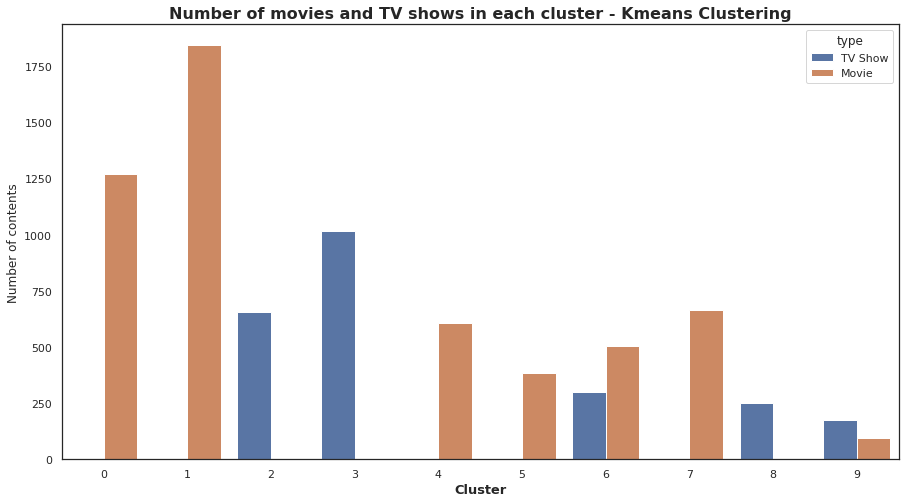

In [ ]:
# Plotting the types of content for each cluster
plt.figure(figsize=(15,8))
sns.countplot(x='kmeans_cluster',data=netflix, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering', fontsize=16, fontweight='bold')
plt.xlabel('Cluster', fontsize=13, fontweight='bold')
plt.ylabel('Number of contents')
plt.show();

Only clusters 6 and 9 have both kinds of contents available. Otherwise the other eight clusters look to be purely TV Show clusters or Movie clusters.

In [ ]:
# Function to plot the wordclouds
def worldcloud(cluster_type, cluster_number, column_name):

  netflix_df_wordcloud = netflix[[cluster_type, column_name]].dropna()
  netflix_df_wordcloud = netflix_df_wordcloud[netflix_df_wordcloud[cluster_type]==cluster_number]
  
  # text documents
  text = " ".join(word for word in netflix_df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
  
  # Generate a word cloud image
  plt.figure(figsize = (8,6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show();

cluster 0


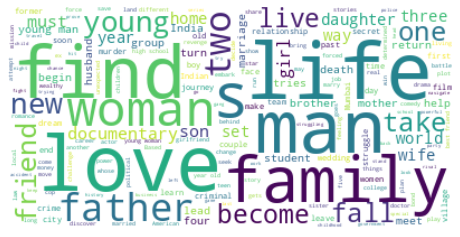

cluster 1


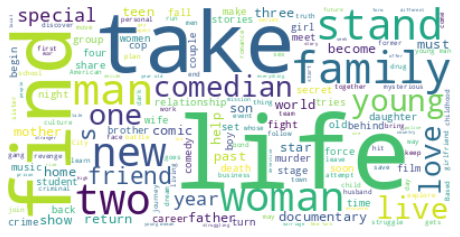

cluster 2


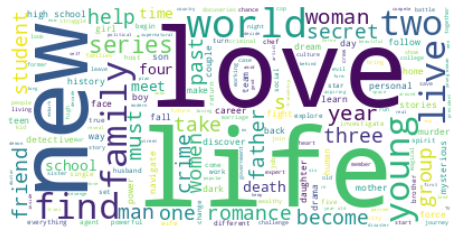

cluster 3


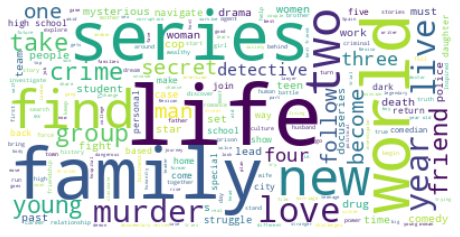

cluster 4


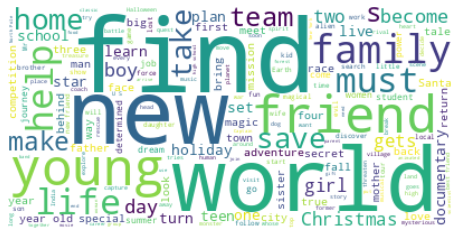

cluster 5


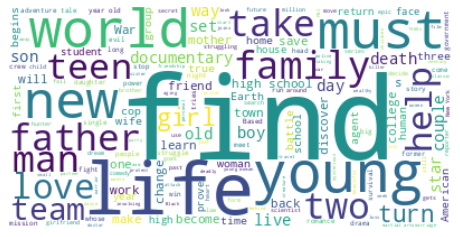

cluster 6


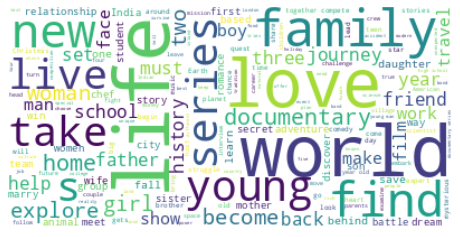

cluster 7


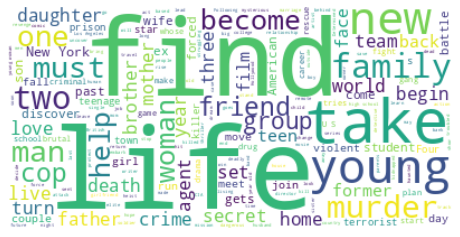

cluster 8


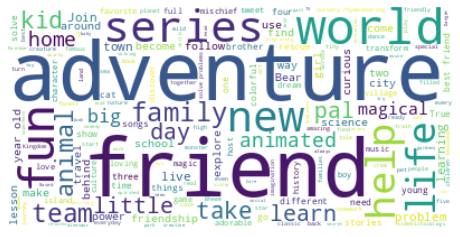

cluster 9


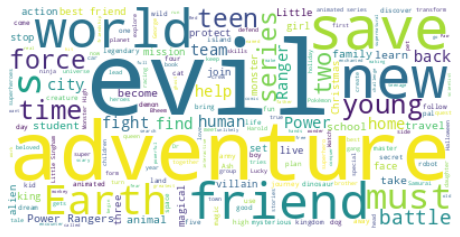

In [ ]:
# Printing the wordclouds for descriptions of each cluster
for i in range(10):
  print(f'cluster {i}')
  worldcloud('kmeans_cluster',i,'description')

cluster 0


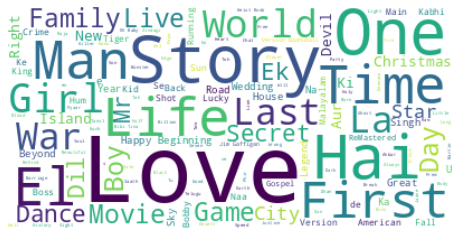

cluster 1


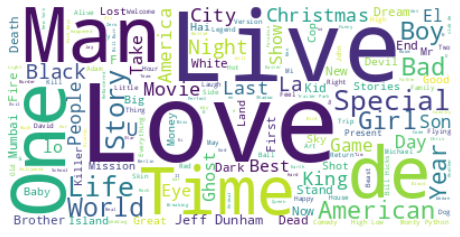

cluster 2


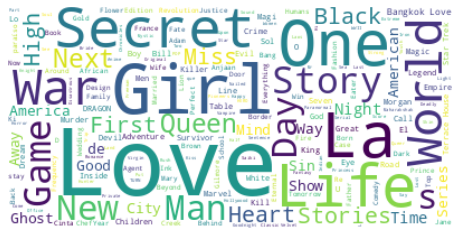

cluster 3


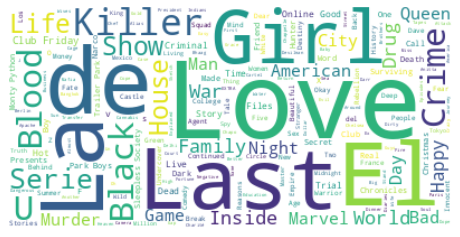

cluster 4


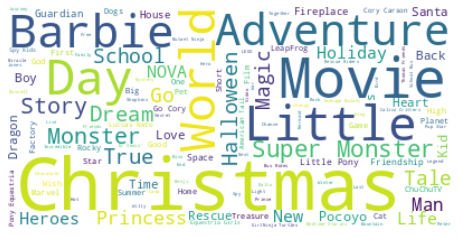

cluster 5


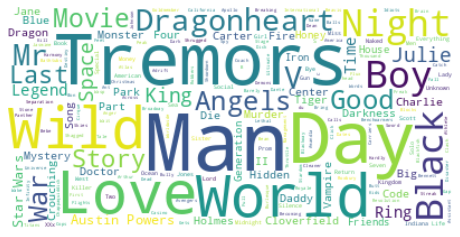

cluster 6


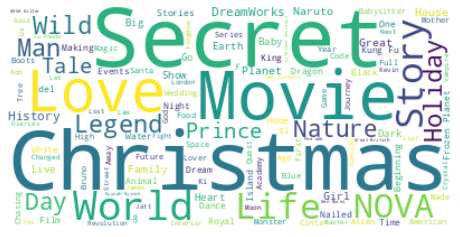

cluster 7


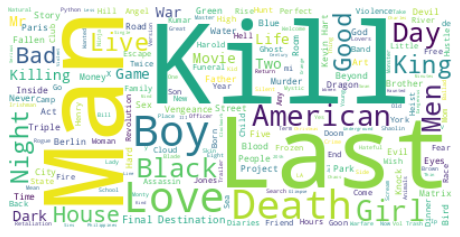

cluster 8


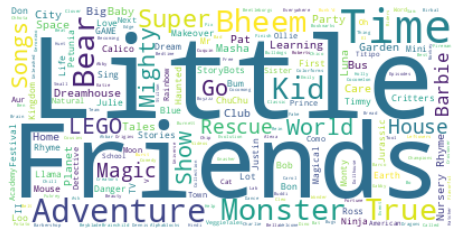

cluster 9


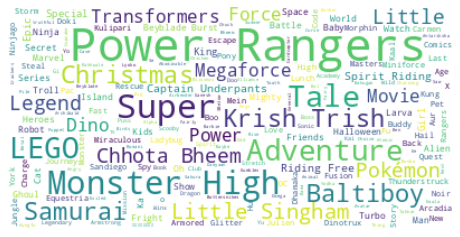

In [ ]:
# Printing the wordclouds for titles of each cluster
for i in range(10):
  print(f'cluster {i}')
  worldcloud('kmeans_cluster',i,'title')

cluster 0


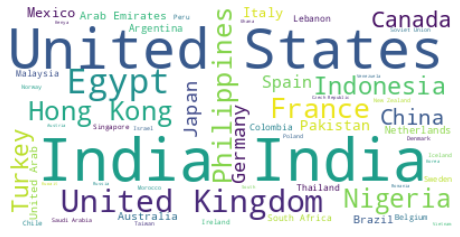

cluster 1


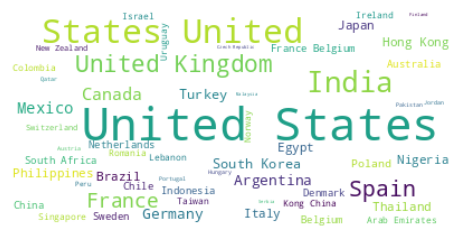

cluster 2


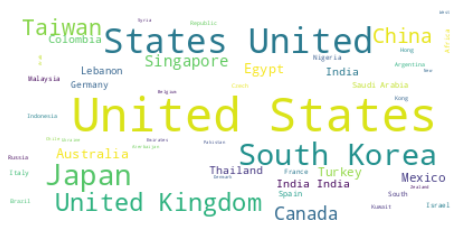

cluster 3


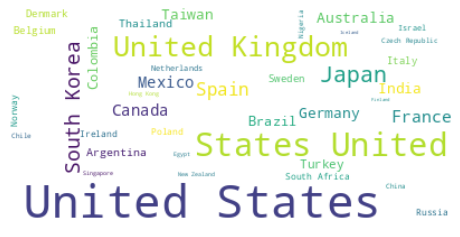

cluster 4


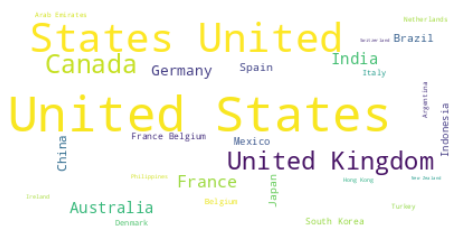

cluster 5


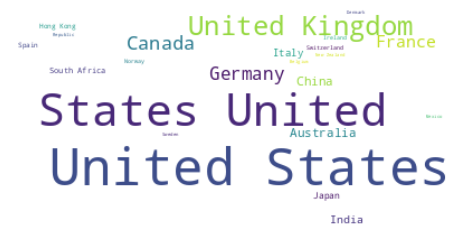

cluster 6


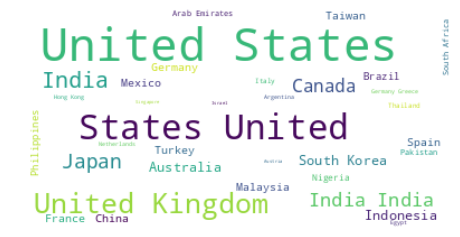

cluster 7


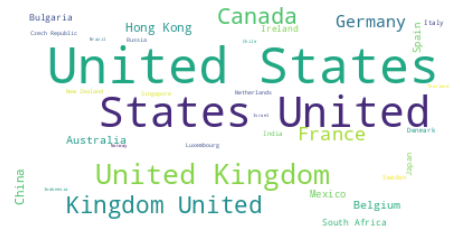

cluster 8


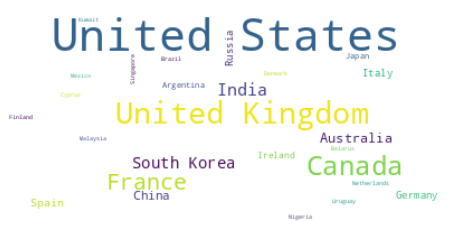

cluster 9


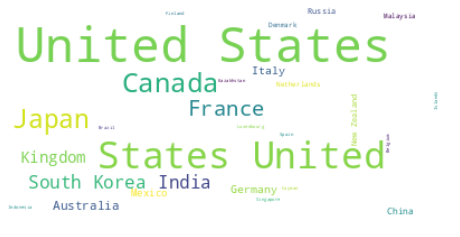

In [ ]:
# Printing the wordclouds for country of each cluster
for i in range(10):
  print(f'cluster {i}')
  worldcloud('kmeans_cluster',i,'country')

cluster 0


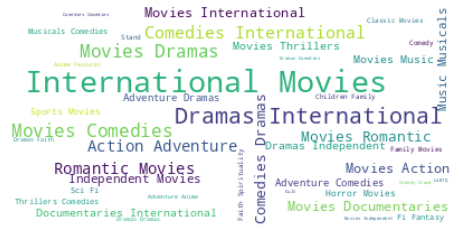

cluster 1


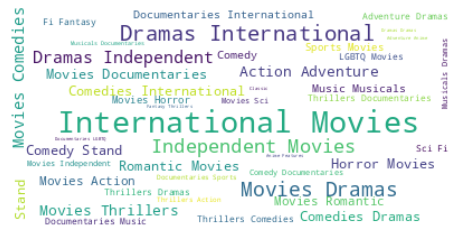

cluster 2


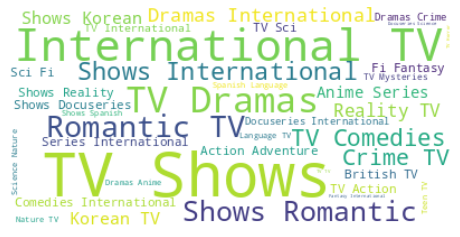

cluster 3


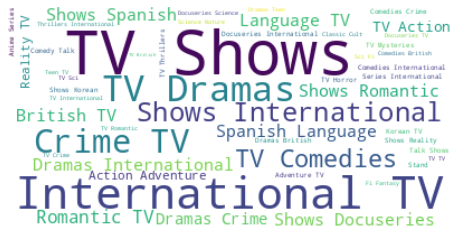

cluster 4


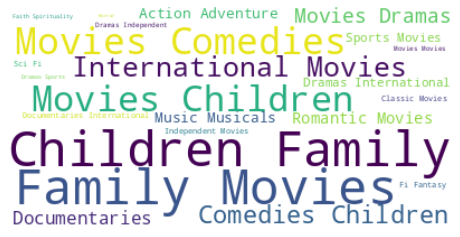

cluster 5


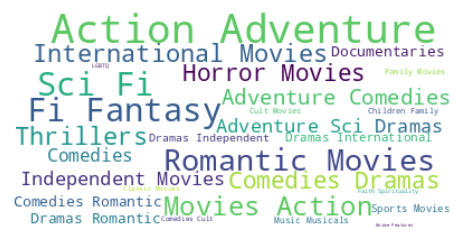

cluster 6


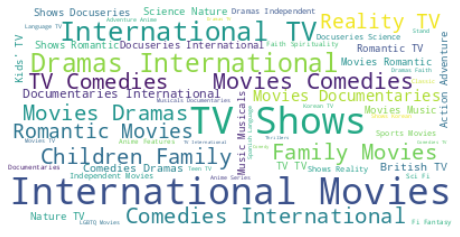

cluster 7


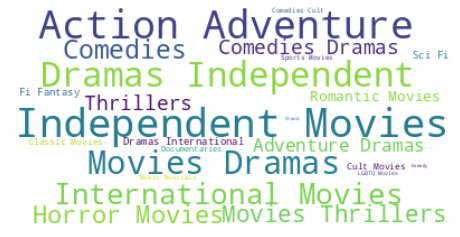

cluster 8


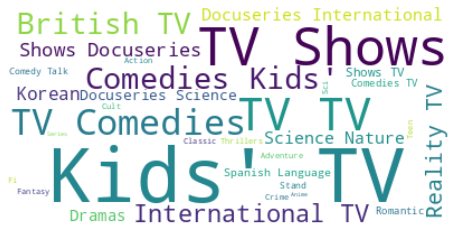

cluster 9


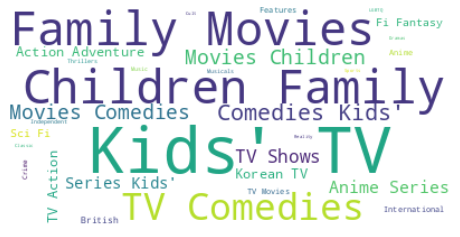

In [ ]:
# Printing the wordclouds for genre of each cluster
for i in range(10):
  print(f'cluster {i}')
  worldcloud('kmeans_cluster',i,'listed_in')

#####**Observation:**

We created 10 clusters using K-Means algorithm. Below are some of the things we have noticed about the clusters from the samples, wordclouds and the other examination methods:

**Cluster 0:** TV-14 rated movie cluster from countries like India, US, UK, Germany, France, Indonesia, Nigeria and many more. Popular genre among this cluster includes International Movies, Romantic Movies, Comedies, Action Movies and Dramas.

**Cluster 1:** TV-MA rated movie cluster from countries like US, UK, India, Canada and France. Popular genre among this cluster includes Documentaries, Comedies, Dramas International, Thriller Movies, Drama Movies and many more.

**Cluster 2:** TV-14 rated TV show cluster from Asian countries Taiwan, China, Singapore, Japan, South Korea apart from the regulars UK and US. Romantic TV Shows, Korean TV, Internatonal TV, TV Comedies and Anime Series are som of the popular genres.

**Cluster 3:** TV-MA rated TV show cluster primarily from US, UK, South Korea, Japan, Brazil, Mexico, Spain and France. Popular genres include Crime TV, Spanish Language, Spanish Shows, International TV Shows, Language TV and TV Comedies.

**Cluster 4:** Movies of various kinds of ratings mainly from US, UK, Australia, Germany, India and France. Popular genres are Comedy Movies, Children Movies, Family Movies, Documentaries and Sports Movies.

**Cluster 5:** PG-13 rated movies mainly from US and UK. Very few other countries appear. Genres from the cluster are Action, Adventure, Sci-Fi, Fiction Fantasy and Horror Movies.

**Cluster 6:** TV-PG rated cluster of both movies and TV Shows from US, UK, India, Japan, Canada, Australia and Indonesia. Popular genres include International TV, International Movies, Children Movies and Reality TV.

**Cluster 7:** R rated movies from US, UK, Canada, Germany and France. A lot of Independent Movies, Horror Movies, Thriller Movies and Action Adventure feature in the cluster.

**Cluster 8:** TV-G and TV-Y rated TV Shows from US, UK, South Korea, Canada and India. Popular genres from the cluster are Kids TV, Comedies Kids, British TV, Reality TV and Docuseries.

**Cluster 9:** TV-Y7 rated TV shows and movies from US, Japan, UK, South Korea and Canada. The top genres are Family Movies, Kids TV, Kids Movies and Comedies.

#### ML Model - 2 - **Implementing Hierarchical Clustering**

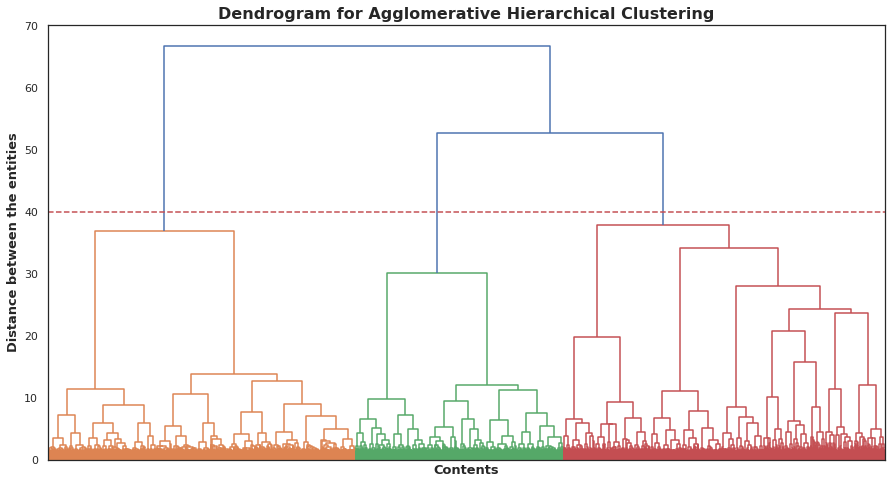

In [ ]:
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(15,8))  
dendogram = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram for Agglomerative Hierarchical Clustering', fontsize = 16, fontweight = 'bold')
plt.xlabel('Contents', fontsize = 13, fontweight = 'bold')
plt.ylabel('Distance between the entities', fontsize = 13, fontweight = 'bold')
plt.axhline(y=40, color='r', linestyle='--')
plt.xticks([])
plt.show();

As per the dendogram we have decided to go ahead with three clusters, with the distance between the entities being 40.

In [ ]:
# Agglomerative Hierarchical Clustering Algorithm Implementation
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_predict = hierarchical.fit_predict(X)

In [ ]:
# Assigning the cluster values to the dataset
netflix['hierarchical_cluster'] = y_predict

In [ ]:
# Sampling data from each cluster
for i in range(3):
  sample_df = netflix[netflix.hierarchical_cluster==i]
  print()
  print('=============================================')
  print(f'Sample from cluser {i}')
  print()
  sample_df.sample(10)


Sample from cluser 0



show_id     type                                              title  \
4983   s4984  TV Show   Prohibition: A Film by Ken Burns and Lynn Novick   
6837   s6838    Movie                           The Royal Hibiscus Hotel   
181     s182    Movie             A Grand Night In: The Story of Aardman   
5041   s5042    Movie         Quiet Victory: The Charlie Wedemeyer Story   
4061   s4062    Movie                                    Mi amigo Alexis   
7266   s7267  TV Show                              Tundukkan Playboy Itu   
3889   s3890  TV Show                          Malibu Rescue: The Series   
4987   s4988    Movie                                      Project Power   
488     s489    Movie  An American Tail: The Treasures of Manhattan I...   
2281   s2282    Movie                                       French Toast   

                           director  \
4983                                  
6837                    Ishaya Bako   
181                   Richard Mears   
5041              Roy Campanella II   
4061  Alejandro Fernández Almendras   
7266                                  
3889                                  
4987    Henry Joost, Ariel Schulman   
488                    Larry Latham   
2281        Paul Krüger, Anél Stolp   

                                                   cast         country  \
4983                                       Peter Coyote   United States   
6837  Zainab Balogun, Kenneth Okolie, Deyemi Okanlaw...         Nigeria   
181                                       Julie Walters  United Kingdom   
5041  Pam Dawber, Michael Nouri, Bess Meyer, Peter B...   United States   
4061  Luciano González, Alexis Sánchez, Daniel Muñoz...           Chile   
7266  Hafidz Roshdi, Uqasha Senrose, Alif Satar, Maw...                   
3889  Ricardo Hurtado, Breanna Yde, Jackie R. Jacobs...   United States   
4987  Jamie Foxx, Joseph Gordon-Levitt, Dominique Fi...   United States   
488   Thomas Dekker, Dom DeLuise, Pat Musick, Nehemi...   United States   
2281  Lika Berning, Thierry Ballarin, Deon Lotz, Hel...    South Africa   

     date_added  release_year rating  duration  \
4983 2017-02-22          2011  TV-PG  1 Season   
6837 2020-06-22          2017  TV-PG    90 min   
181  2016-11-01          2015  TV-PG    59 min   
5041 2011-10-01          1988  TV-PG    93 min   
4061 2019-08-30          2019  TV-PG   102 min   
7266 2018-01-08          2016  TV-PG  1 Season   
3889 2019-06-03          2019   TV-G  1 Season   
4987 2020-08-14          2020      R   113 min   
488  2018-04-01          2000      G    79 min   
2281 2020-02-12          2015  TV-PG    86 min   

                                              listed_in  \
4983                         Crime TV Shows, Docuseries   
6837    Comedies, International Movies, Romantic Movies   
181                                       Documentaries   
5041                              Dramas, Sports Movies   
4061         Children & Family Movies, Comedies, Dramas   
7266  International TV Shows, Romantic TV Shows, TV ...   
3889       Kids' TV, TV Action & Adventure, TV Comedies   
4987                                 Action & Adventure   
488                            Children & Family Movies   
2281    Comedies, International Movies, Romantic Movies   

                                            description  month_added  \
4983  Ken Burns's documentary traces the passage of ...         2.00   
6837  A disenchanted chef tries to help her parents ...         6.00   
181   Aardman Animations icons Wallace & Gromit, Mor...        11.00   
5041  When high school football coach Charlie Wedeme...        10.00   
4061  When a young soccer fan and his idol forge an ...         8.00   
7266  Under pressure from his parents to settle down...         1.00   
3889  On the heels of Junior Rescue training, Team F...         6.00   
4987  An ex-soldier, a teen and a cop collide in New...         8.00   
488   When Fievel and friends go hunting for buried ...        


Sample from cluser 1



show_id     type                                        title  \
1239   s1240  TV Show                              Castle of Stars   
2322   s2323    Movie                           İstanbul Kırmızısı   
7341   s7342  TV Show                               Undercover Law   
4156   s4157  TV Show                               Mob Psycho 100   
2349   s2350    Movie                                    Gangaajal   
4865   s4866    Movie                                Pinky Memsaab   
7279   s7280    Movie  Twin Murders: the Silence of the White City   
6299   s6300    Movie                               The Diabolical   
1727   s1728    Movie                                 Devil's Gate   
6328   s6329    Movie                                      The End   

               director                                               cast  \
1239                     Chaiyapol Pupart, Jintanutda Lummakanon, Worra...   
2322     Ferzan Özpetek  Halit Ergenç, Nejat İşler, Mehmet Günsür, Çiğd...   
7341                     Viña Machado, Juana del Río, Luna Baxter, Vale...   
4156                     Tatsuomi Hamada, Kazuki Namioka, Yuki Yoda, Ay...   
2349        Prakash Jha  Ajay Devgn, Gracy Singh, Mohan Agashe, Mohan J...   
4865    Shazia Ali Khan  Hajira Yamin, Kiran Malik, Adnan Jaffar, Sunny...   
7279  Daniel Calparsoro  Belén Rueda, Javier Rey, Aura Garrido, Manolo ...   
6299   Alistair Legrand  Ali Larter, Arjun Gupta, Max Rose, Merrin Dung...   
1727         Clay Staub  Amanda Schull, Milo Ventimiglia, Shawn Ashmore...   
6328    Mohammed Alhmly  Mohamed El Hemaly, Abdulla Al-khudr, Ghadeer Z...   

                             country date_added  release_year rating  \
1239                                 2018-09-07          2015  TV-MA   
2322                   Italy, Turkey 2020-04-28          2017  TV-MA   
7341                        Colombia 2018-08-31          2017  TV-MA   
4156                           Japan 2018-05-22          2018  TV-MA   
2349                           India 2021-01-08          2003  TV-MA   
4865  Pakistan, United Arab Emirates 2019-04-01          2018  TV-MA   
7279                           Spain 2020-03-06          2020  TV-MA   
6299                   United States 2018-08-01          2015  TV-MA   
1727                          Canada 2020-07-16          2017  TV-MA   
6328                          Kuwait 2020-05-17          2019  TV-MA   

      duration                                          listed_in  \
1239  1 Season  International TV Shows, Romantic TV Shows, TV ...   
2322   110 min   Dramas, Independent Movies, International Movies   
7341  1 Season  Crime TV Shows, International TV Shows, Spanis...   
4156  1 Season  International TV Shows, TV Action & Adventure,...   
2349   148 min                       Dramas, International Movies   
4865   124 min   Dramas, Independent Movies, International Movies   
7279   110 min                    International Movies, Thrillers   
6299    86 min         Horror Movies, Sci-Fi & Fantasy, Thrillers   
1727    94 min         Horror Movies, Sci-Fi & Fantasy, Thrillers   
6328    97 min  Action & Adventure, Comedies, International Mo...   

                                            description  month_added  \
1239  As four couples with different lifestyles go t...         9.00   
2322  Upon his return to Istanbul, an expat writer-e...         4.00   
7341  Female intelligence agents infiltrate the disp...         8.00   
4156  There's an organization gathering espers for a...         5.00   
2349  Posted to a small, crime-ridden town, a cop so...         1.00   
4865  When a guileless young woman becomes the domes...         4.00   
7279  A detective returns to Vitoria-Gasteiz to solv...         3.00   
6299  Terrorized by unexplained disturbances and hor...         8.00   
1727  Seeking a missing woman in North Dakota, an FB...         7.00   
6328  A wrongly accused man is pursued by a dogged i...         5.00   

      day_of_week_added  year


Sample from cluser 2



show_id     type                    title           director  \
4831   s4832  TV Show       Person of Interest                      
2427   s2428  TV Show              Girlfriends                      
3309   s3310    Movie  Karthik Calling Karthik      Vijay Lalwani   
5130   s5131  TV Show          Record of Youth                      
3854   s3855  TV Show         Magic for Humans                      
6409   s6410    Movie       The Gospel of Luke        David Batty   
132     s133  TV Show                7 (Seven)        Nizar Shafi   
3026   s3027    Movie          Internet Famous  Michael Gallagher   
1996   s1997    Movie         Empire of Scents         Kim Nguyen   
3110   s3111    Movie             Jagga Jasoos        Anurag Basu   

                                                   cast  \
4831  Jim Caviezel, Michael Emerson, Taraji P. Henso...   
2427  Tracee Ellis Ross, Golden Brooks, Persia White...   
3309  Farhan Akhtar, Deepika Padukone, Ram Kapoor, V...   
5130  Park Bo-gum, Park So-dam, Byeon Woo-seok, Ha H...   
3854                                     Justin Willman   
6409  Selva Rasalingam, Karima Gouit, Mourad Zaoui, ...   
132   Rahman, Havish, Regina Cassandra, Nandita Swet...   
3026  Shane Dawson, Steve Greene, Amanda Cerny, Chri...   
1996                                                      
3110  Ranbir Kapoor, Katrina Kaif, Saurabh Shukla, S...   

                                            country date_added  release_year  \
4831                                  United States 2016-09-22          2016   
2427                                  United States 2020-09-11          2007   
3309                                          India 2019-12-15          2010   
5130                                    South Korea 2020-09-08          2020   
3854                                  United States 2020-05-15          2020   
6409         United States, United Kingdom, Morocco 2018-10-19          2015   
132                                           India 2019-07-30          2019   
3026                                  United States 2016-07-21          2016   
1996  Canada, France, Italy, Morocco, United States 2018-01-01          2014   
3110                                          India 2018-10-01          2017   

     rating   duration                                          listed_in  \
4831  TV-14  5 Seasons   Crime TV Shows, TV Action & Adventure, TV Dramas   
2427  TV-14  8 Seasons                                        TV Comedies   
3309  TV-14    135 min            Dramas, International Movies, Thrillers   
5130  TV-14   1 Season  International TV Shows, Romantic TV Shows, TV ...   
3854  TV-14  3 Seasons                            Reality TV, TV Comedies   
6409  TV-14    205 min                       Dramas, Faith & Spirituality   
132   TV-14   1 Season                                           TV Shows   
3026  TV-14     87 min                                           Comedies   
1996  TV-14     87 min                Documentaries, International Movies   
3110  TV-14    155 min  Action & Adventure, Comedies, International Mo...   

                                            description  month_added  \
4831  Ex-CIA agent John Reese and enigmatic billiona...         9.00   
2427  Four close friends in Los Angeles challenge an...         9.00   
3309  Unlucky in love and bullied at work, an office...        12.00   
5130  Two actors and a makeup artist fight to make t...         9.00   
3854  From baffling people on the street to orchestr...         5.00   
6409  Word-for-word Bible texts of the entire book o...        10.00   
132   Multiple women report their husbands as missin...         7.00   
3026  Five viral Internet celebrities travel to a co...         7.00   
1996  This documentary explores the extent to which ...         1.00   
3110  An eccentric, self-proclaimed detective goes o...        10.00   

      day_of_week_added  year_added  day_of_month_added date_month_added 

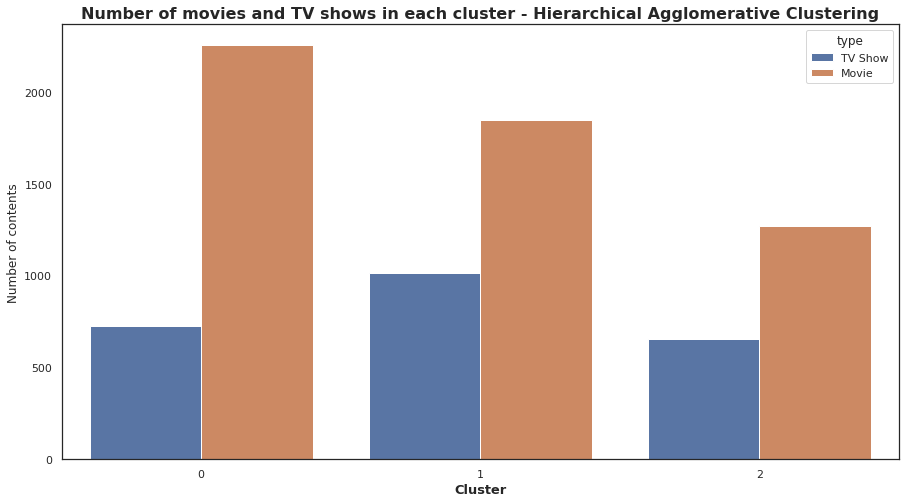

In [ ]:
# Plotting the types of content for each cluster
plt.figure(figsize=(15,8))
sns.countplot(x='hierarchical_cluster',data=netflix, hue='type')
plt.title('Number of movies and TV shows in each cluster - Hierarchical Agglomerative Clustering', fontsize=16, fontweight='bold')
plt.xlabel('Cluster', fontsize=13, fontweight='bold')
plt.ylabel('Number of contents')
plt.show();

cluster 0


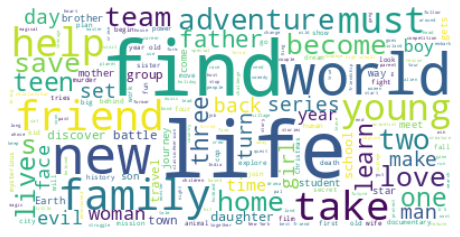

cluster 1


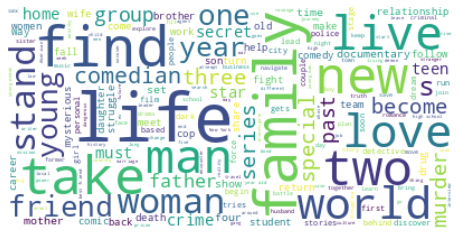

cluster 2


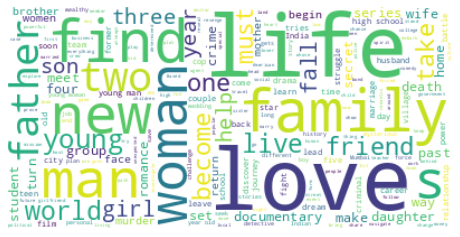

In [ ]:
# Printing the wordclouds for descriptions of each cluster
for i in range(3):
  print(f'cluster {i}')
  worldcloud('hierarchical_cluster',i,'description')

cluster 0


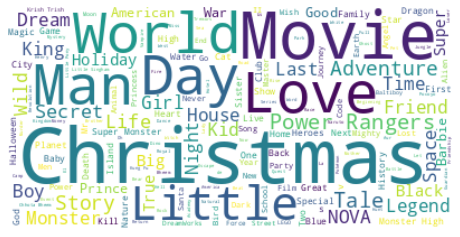

cluster 1


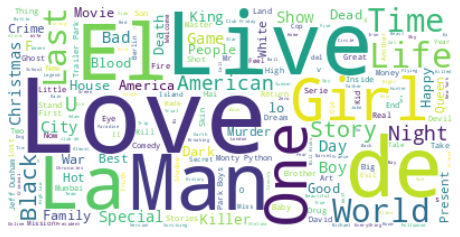

cluster 2


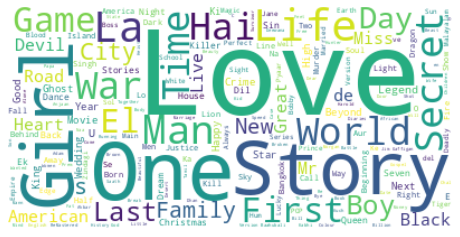

In [ ]:
# Printing the wordclouds for title of each cluster
for i in range(3):
  print(f'cluster {i}')
  worldcloud('hierarchical_cluster',i,'title')

cluster 0


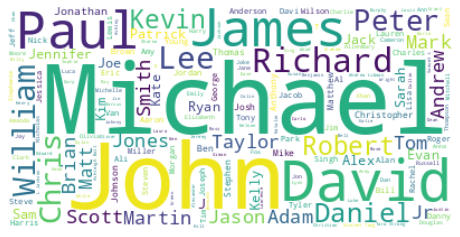

cluster 1


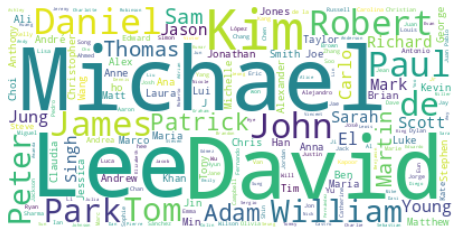

cluster 2


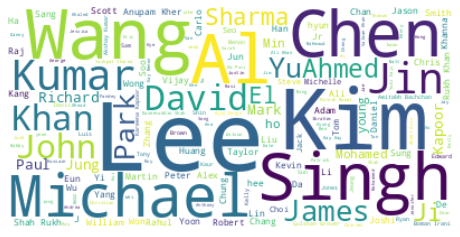

In [ ]:
# Printing the wordclouds for cast of each cluster
for i in range(3):
  print(f'cluster {i}')
  worldcloud('hierarchical_cluster',i,'cast')

cluster 0


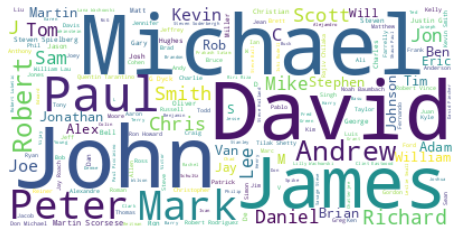

cluster 1


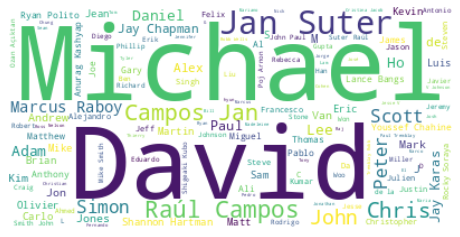

cluster 2


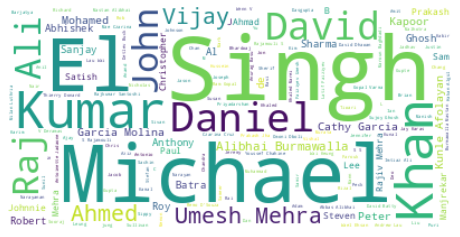

In [ ]:
# Printing the wordclouds for director of each cluster
for i in range(3):
  print(f'cluster {i}')
  worldcloud('hierarchical_cluster',i,'director')

cluster 0


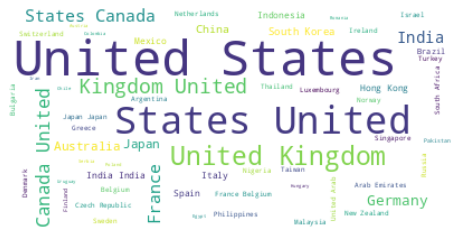

cluster 1


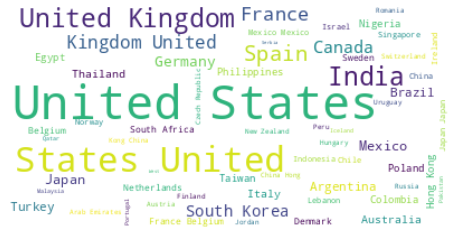

cluster 2


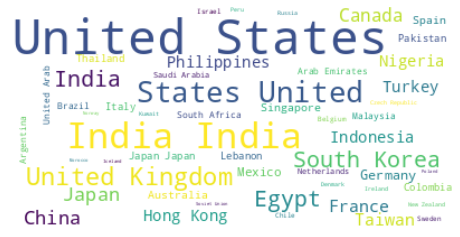

In [ ]:
# Printing the wordclouds for country of each cluster
for i in range(3):
  print(f'cluster {i}')
  worldcloud('hierarchical_cluster',i,'country')

cluster 0


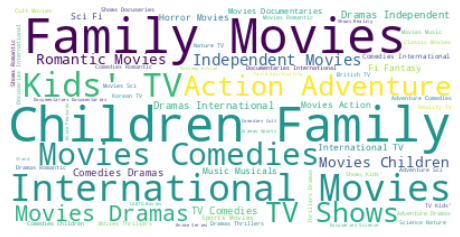

cluster 1


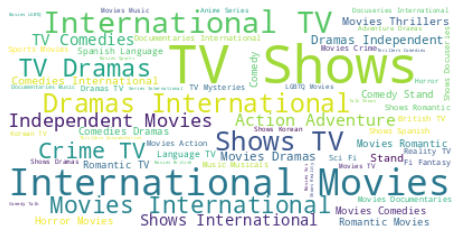

cluster 2


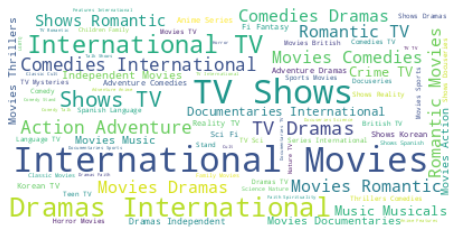

In [ ]:
# Printing the wordclouds for genre of each cluster
for i in range(3):
  print(f'cluster {i}')
  worldcloud('hierarchical_cluster',i,'listed_in')

In [ ]:
# Checking the distribution of TV ratings
netflix[netflix['hierarchical_cluster']==0]['rating'].value_counts(normalize=True)

TV-PG      0.27
R          0.22
PG-13      0.13
TV-Y       0.09
TV-Y7      0.09
PG         0.08
TV-G       0.07
NR         0.03
G          0.01
TV-Y7-FV   0.00
UR         0.00
NC-17      0.00
Name: rating, dtype: float64

In [ ]:
# Checking the distribution of TV ratings
netflix[netflix['hierarchical_cluster']==1]['rating'].value_counts(normalize=True)

TV-MA   1.00
Name: rating, dtype: float64

In [ ]:
# Checking the distribution of TV ratings
netflix[netflix['hierarchical_cluster']==2]['rating'].value_counts(normalize=True)

TV-14   1.00
Name: rating, dtype: float64

#####**Observation:**

We have obtained three clusters using Agglomerative Hierarchical Clustering Method. The description of those three clusters are:

**Cluster 0:** Contains TV shows and movies of all kinds of ratings except for TV-14 and TV-MA. US, UK, Canada and France seem to be the most popular countries whereas Family Movies, Kids TV, Comedies and Action Adventure are some of the popular genres.

**Cluster 1:** Contains TV shows and movies of TV-MA rating. US, UK, India, France, Canada and Spain are the popular countries. Genres that are popular in this cluster are TV Dramas, Crime TV, International Movies and International Dramas.

**Cluster 2:** Contains TV shows and movies of TV-14 rating. India, US, Phillipines, South Korea, China and Egypt are the popular countries. International Movies, International TV, Comedies, Musicals and Romantic Shows are the popular genres.

#### Final Model:

Given the nature of the clusters formed by Hierarchichal Clustering, there aren't much seperation done based on some important features. 

The three clusters are just divided based as follows: the contents with the two most dominant TV ratings are two of the three clusters and the rest of the content is clubbed in the final cluster.

And so, if we were to decide which one to choose as the final model, we will perhaps go ahead with the KMeans Clusters. However, this call also depends on the business domain and the requirements of the main stakeholders of the projects.

# **Conclusion**


**Conclusions from EDA Process:**

There are more than double the amount of Movies than TV Shows on Netflix. Movies account for 69.05% whereas TV Shows account for 30.95% of the dataset.

If we look at the distribution of the dates when the contents were added, the second half of a year (the holiday period) is usually when they add the content and it is either on the 1st or the 15th or the 31st.

United States has the highest number of contents produced and it is three times in numbers when compared with the next best in line, India.

Countries generally focus a lot on movies, but there are exceptions. East Asian countries like Japan and South Korea produce more TV Shows than movies.

Whereas, a country like India could do a lot better in the TV Shows domain.

Netflix really took off since 2015, before which the rate at which newer contents were added were quite slow. Also, while movies are added in large numbers, their growth has stopped and the numbers went down for the first time while going from 2019 to 2020.

While in contrast, TV Shows have almost shown a steady growth and never saw any kind of drop in numbers, not even going in 2020.

January, December and October are the peak months. Whereas, February and May to September don't have much contents added, relatively. March has an abnormal behaviour when compared with the rest of the months.

Weekends have the lowest number of releases. However, Friday has the highest of all the days of the week. Movies again are larger in number than TV Shows and the trend is almost similar between the two on all the days.

Again, the content released graph has very little surprises for us. The focus has shifted a lot on releasing newer TV shows more than movies. So much has the focus shifted that for the first time ever, in 2020, the number of TV shows released surpassed the number of movie releases on Netflix. 

Contents suitable for all are very few in number whereas contents with restrictions like TV-MA (unsuitable for under 17), TV-14 (may be unsuitable for under 14) and TV-PG (unsuitable for young childern) are the three highest in numbers.

A lot of TV Shows (more than 1600) have only one season. Almost 400 have two and there is almost an exponential decrement in the number of TV Shows with even larger number of seasons.

A lot of the movies are between 60 to 150 mins long. But there are movies with more than 300+ minutes duration.

International TV Shows and International Movies are two of the most dominant genres. Others include Dramas, Comedies, Documentaries and Action & Adventure.

The top 10 TV shows directors on Netflix doesn't feature directors with more than 3 TV Shows on the streaming service.

Some of the biggest names of the industry like Steven Spielberg, Martin Scorsese and Jay Chapman feature in the list of top 10 movie directors on Netflix.

A lot of Asian, perhaps East Asian actors feature on the list of top 10 actors/actresses for TV Shows on Netflix.

The list of top 10 movies actors is full of A-listers from Bollywood, as expected given the number of movies from India on Netflix.

**Conclusions from Hypothesis Testing done:**

Given our very low p-value, we couldn't find enough significant evidence to accept the null hypothesis that there is no difference in the TV ratings for Netflix's original and non-original contents.

Since the p-value is very low, we once again don't have enough evidence to accept the null hypothesis that the duration of the Netflix Original movies and the other movies are same and hence that they're from same distribution.

**Conclusions from clusters of our final chosen clustering model:**

We created 10 clusters using K-Means algorithm. Below are some of the things we have noticed about the clusters from the samples, wordclouds and the other examination methods:

**Cluster 0:** TV-14 rated movie cluster from countries like India, US, UK, Germany, France, Indonesia, Nigeria and many more. Popular genre among this cluster includes International Movies, Romantic Movies, Comedies, Action Movies and Dramas.

**Cluster 1:** TV-MA rated movie cluster from countries like US, UK, India, Canada and France. Popular genre among this cluster includes Documentaries, Comedies, Dramas International, Thriller Movies, Drama Movies and many more.

**Cluster 2:** TV-14 rated TV show cluster from Asian countries Taiwan, China, Singapore, Japan, South Korea apart from the regulars UK and US. Romantic TV Shows, Korean TV, Internatonal TV, TV Comedies and Anime Series are som of the popular genres.

**Cluster 3:** TV-MA rated TV show cluster primarily from US, UK, South Korea, Japan, Brazil, Mexico, Spain and France. Popular genres include Crime TV, Spanish Language, Spanish Shows, International TV Shows, Language TV and TV Comedies.

**Cluster 4:** Movies of various kinds of ratings mainly from US, UK, Australia, Germany, India and France. Popular genres are Comedy Movies, Children Movies, Family Movies, Documentaries and Sports Movies.

**Cluster 5:** PG-13 rated movies mainly from US and UK. Very few other countries appear. Genres from the cluster are Action, Adventure, Sci-Fi, Fiction Fantasy and Horror Movies.

**Cluster 6:** TV-PG rated cluster of both movies and TV Shows from US, UK, India, Japan, Canada, Australia and Indonesia. Popular genres include International TV, International Movies, Children Movies and Reality TV.

**Cluster 7:** R rated movies from US, UK, Canada, Germany and France. A lot of Independent Movies, Horror Movies, Thriller Movies and Action Adventure feature in the cluster.

**Cluster 8:** TV-G and TV-Y rated TV Shows from US, UK, South Korea, Canada and India. Popular genres from the cluster are Kids TV, Comedies Kids, British TV, Reality TV and Docuseries.

**Cluster 9:** TV-Y7 rated TV shows and movies from US, Japan, UK, South Korea and Canada. The top genres are Family Movies, Kids TV, Kids Movies and Comedies.